In [ ]:
#importing all the packages used for data analysis

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

#Beaufort,  South Carolina (ERP) - Using For Modeling


In [ ]:
Beauf_SC_df = pd.read_csv('Budgeted_Revenues_Beaufort_SC.csv')

Beauf_SC_df.head(10)


In [ ]:
#dropping columns that contain only null values that we do not care about
Beauf_SC_df = Beauf_SC_df.drop(['FunctionDescription', 'DepartmentGroup', 'Department', 'ProjectCode', 'FunctionGroup', 'Project', 'Segment6', 'Segment7', 'Segment8', 'CharacterCode'], axis =1)
Beauf_SC_df

In [ ]:
Beauf_SC_df[Beauf_SC_df.isna().any(axis =1)]
#there are no null values in our dataset

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId


In [ ]:
Beauf_SC_df.tail(8)

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId
22790,RENTAL CO PROPERTY- R&C,20278,Inactive,Revenue,1300.00,MISCELLANEOUS,City,07/01/2021 12:00:00 AM,2022,4502-80-0001-000-00000-47210,RURAL&CRITICAL PASSIVE PARKS,4502,4502,RENTAL CO PROPERTY-OTHERS,47210,RURAL & CRITICAL PASSIVE PARKS,45020001,0.0,0.0,CAPITAL PROJECTS,80,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2022-1-20278
22791,FEDERAL GRANT FUNDS,19554,Active,Revenue,4714.96,INTERGOVERNMENTAL,City,09/01/2017 12:00:00 AM,2018,2733-20-0001-000-00000-43780,17EMPG01,2733,2733,FEDERAL GRANT FUNDS,43780,17EMPG01 REV,27330001,0.0,0.0,PUBLIC SAFETY,20,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2018-3-19554
22792,AUTOMOBILE TAXES,17241,Active,Revenue,46056.22,AD VALOREM TAXES,City,08/01/2018 12:00:00 AM,2019,7311-05-0001-000-00000-41030,BURTON FD OPERATIONS,7311,7311,AUTOMOBILE TAXES,41030,BURTON FD OPERATIONS,73110001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-17241
22793,TRUST FUNDS RECEIVED - SEX OFF,15887,Active,Revenue,450.00,MISCELLANEOUS,City,06/01/2019 12:00:00 AM,2019,2258-20-0001-000-00000-47504,SHERIFF DRUG TRUST,2258,2258,FEES FOR MARSHES AT LADYS ISLD,47504,SHERIFF DRUG TRUST,22580001,0.0,0.0,PUBLIC SAFETY,20,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-15887
22794,INTEREST ON INVESTMENTS,17433,Active,Revenue,292.66,INTEREST,City,06/01/2019 12:00:00 AM,2019,7701-05-0001-000-00000-46010,BURLINGTON LAND ROAD PAVING,7701,7701,INTEREST ON INVESTMENTS,46010,BURLINGTON LAND ROAD PAVING,77010001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-17433
22795,SCDDSN CONTRACT PEYTON,16185,Active,Revenue,20851.18,INTERGOVERNMENTAL,City,09/01/2018 12:00:00 AM,2019,2450-40-0001-000-00000-43532,DSN COMMUNITY TRAINING PROGRAM,2450,2450,SCDDSN CONTRACT PEYTON,43532,DSN COMMUNITY TRAINING PROGRAM,24500001,0.0,0.0,PUBLIC HEALTH,40,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-3-16185
22796,3% & 7% PENALTIES ON TAX,17138,Active,Revenue,396.37,AD VALOREM TAXES,City,01/01/2020 12:00:00 AM,2020,7073-05-0001-000-00000-41040,HHPSD #1 DEBT SERVICE,7073,7073,3% & 7% PENALTIES ON TAX,41040,HHPSD #1 DEBT SERVICE,70730001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-7-17138
22797,MERCHANTS INVENTORY TAX,17095,Active,Revenue,23.98,INTERGOVERNMENTAL,City,08/01/2018 12:00:00 AM,2019,7051-05-0001-000-00000-43020,FBPSD CORPORATE PURPOSE,7051,7051,MERCHANTS INVENTORY TAX,43020,FBPSD CORPORATE PURPOSE,70510001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-17095


In [ ]:
Beauf_SC_df.columns

Index(['AccountDescription', 'AccountId', 'AccountStatus', 'AccountType',
       'Actual', 'CharacterCodeDescription', 'Entity', 'FiscalMonth',
       'FiscalYear', 'FullAccount', 'Fund', 'FundCode', 'FundGroup', 'Object',
       'ObjectCode', 'Organization', 'OrganizationCode', 'OriginalBudget',
       'RevisedBudget', 'Segment2', 'Segment2Code', 'Segment3', 'Segment3Code',
       'Segment4', 'Segment4Code', 'Segment5', 'Segment5Code', 'Segment6Code',
       'Segment7Code', 'Segment8Code', 'UniqueId'],
      dtype='object')

In [ ]:
Beauf_SC_df['FiscalYear'].unique()

array([2019, 2021, 2020, 2018, 2022])

In [ ]:
Beauf_SC_df['FiscalMonth'].unique()

array(['04/01/2019 12:00:00 AM', '08/01/2018 12:00:00 AM',
       '05/01/2021 12:00:00 AM', '08/01/2019 12:00:00 AM',
       '07/01/2018 12:00:00 AM', '06/01/2019 12:00:00 AM',
       '08/01/2017 12:00:00 AM', '03/01/2018 12:00:00 AM',
       '07/01/2019 12:00:00 AM', '05/01/2019 12:00:00 AM',
       '11/01/2017 12:00:00 AM', '04/01/2018 12:00:00 AM',
       '01/01/2019 12:00:00 AM', '12/01/2019 12:00:00 AM',
       '01/01/2021 12:00:00 AM', '12/01/2020 12:00:00 AM',
       '10/01/2020 12:00:00 AM', '02/01/2019 12:00:00 AM',
       '05/01/2018 12:00:00 AM', '11/01/2018 12:00:00 AM',
       '02/01/2018 12:00:00 AM', '06/01/2020 12:00:00 AM',
       '08/01/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '10/01/2017 12:00:00 AM', '11/01/2019 12:00:00 AM',
       '10/01/2019 12:00:00 AM', '06/01/2018 12:00:00 AM',
       '07/01/2020 12:00:00 AM', '12/01/2018 12:00:00 AM',
       '03/01/2019 12:00:00 AM', '03/01/2020 12:00:00 AM',
       '12/01/2017 12:00:00 AM', '04/01/2021 12:00:00 AM

In [ ]:
Beauf_SC_df['Segment2'].unique()

array(['CULTURAL & RECREATIONAL', 'GENERAL GOVERNMENT', 'PUBLIC SAFETY',
       'PUBLIC WORKS', 'PUBLIC HEALTH', 'PUBLIC WELFARE', 'DEBT SERVICE',
       'CAPITAL PROJECTS', 'ENTERPRISE', 'AGENCY',
       'CENTRAL DEPOSITORY/REPORTING'], dtype=object)

In [ ]:
Beauf_SC_df.head(2)

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId
0,RETAIL SALES,15399,Active,Revenue,15.0,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399
1,RETAIL SALES,15399,Active,Revenue,215.0,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399


Dates start from July 2017 to june 2022

Metadata: 
*   Month/Year( Dates start from July 2017 to February 2022)
*   Subcategorization of sales Tax(columns: Segment2, AccountDescription, Organization)
*

State: SC
Municipilaties: None
Revenue: Has Actual column, OriginalBudget, Revised Budget, ObligatedAmount
Category: Contains subcategories columns: Segment2, AccountDescription, FundOrganization, FundGroup, Object, Organization, Segment3, CharacterCodeDescription



In [ ]:
Beauf_SC_df.head(2)

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId
0,RETAIL SALES,15399,Active,Revenue,15.0,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399
1,RETAIL SALES,15399,Active,Revenue,215.0,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399


In [ ]:
Beauf_SC_df.shape

(22798, 31)

In [ ]:
filtered_beauf = Beauf_SC_df[Beauf_SC_df['Actual'] > 0]
filtered_beauf.shape

(21150, 31)

In [ ]:
filtered_beauf['FiscalMonth'].unique()

array(['04/01/2019 12:00:00 AM', '08/01/2018 12:00:00 AM',
       '05/01/2021 12:00:00 AM', '08/01/2019 12:00:00 AM',
       '07/01/2018 12:00:00 AM', '06/01/2019 12:00:00 AM',
       '08/01/2017 12:00:00 AM', '03/01/2018 12:00:00 AM',
       '07/01/2019 12:00:00 AM', '05/01/2019 12:00:00 AM',
       '04/01/2018 12:00:00 AM', '01/01/2019 12:00:00 AM',
       '12/01/2019 12:00:00 AM', '01/01/2021 12:00:00 AM',
       '12/01/2020 12:00:00 AM', '10/01/2020 12:00:00 AM',
       '02/01/2019 12:00:00 AM', '05/01/2018 12:00:00 AM',
       '11/01/2018 12:00:00 AM', '02/01/2018 12:00:00 AM',
       '06/01/2020 12:00:00 AM', '08/01/2020 12:00:00 AM',
       '01/01/2020 12:00:00 AM', '10/01/2017 12:00:00 AM',
       '11/01/2019 12:00:00 AM', '10/01/2019 12:00:00 AM',
       '06/01/2018 12:00:00 AM', '07/01/2020 12:00:00 AM',
       '12/01/2018 12:00:00 AM', '03/01/2019 12:00:00 AM',
       '11/01/2017 12:00:00 AM', '03/01/2020 12:00:00 AM',
       '12/01/2017 12:00:00 AM', '04/01/2021 12:00:00 AM

In [ ]:
Beauf_SC_df['FiscalMonth'].unique()

array(['04/01/2019 12:00:00 AM', '08/01/2018 12:00:00 AM',
       '05/01/2021 12:00:00 AM', '08/01/2019 12:00:00 AM',
       '07/01/2018 12:00:00 AM', '06/01/2019 12:00:00 AM',
       '08/01/2017 12:00:00 AM', '03/01/2018 12:00:00 AM',
       '07/01/2019 12:00:00 AM', '05/01/2019 12:00:00 AM',
       '11/01/2017 12:00:00 AM', '04/01/2018 12:00:00 AM',
       '01/01/2019 12:00:00 AM', '12/01/2019 12:00:00 AM',
       '01/01/2021 12:00:00 AM', '12/01/2020 12:00:00 AM',
       '10/01/2020 12:00:00 AM', '02/01/2019 12:00:00 AM',
       '05/01/2018 12:00:00 AM', '11/01/2018 12:00:00 AM',
       '02/01/2018 12:00:00 AM', '06/01/2020 12:00:00 AM',
       '08/01/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '10/01/2017 12:00:00 AM', '11/01/2019 12:00:00 AM',
       '10/01/2019 12:00:00 AM', '06/01/2018 12:00:00 AM',
       '07/01/2020 12:00:00 AM', '12/01/2018 12:00:00 AM',
       '03/01/2019 12:00:00 AM', '03/01/2020 12:00:00 AM',
       '12/01/2017 12:00:00 AM', '04/01/2021 12:00:00 AM

In [ ]:
Beauf_SC_df['FiscalMonth'].value_counts()

06/01/2021 12:00:00 AM    641
06/01/2019 12:00:00 AM    611
06/01/2020 12:00:00 AM    580
07/01/2018 12:00:00 AM    577
07/01/2017 12:00:00 AM    576
06/01/2018 12:00:00 AM    562
04/01/2021 12:00:00 AM    543
07/01/2019 12:00:00 AM    533
07/01/2020 12:00:00 AM    499
07/01/2021 12:00:00 AM    481
03/01/2018 12:00:00 AM    448
12/01/2018 12:00:00 AM    445
03/01/2020 12:00:00 AM    437
01/01/2020 12:00:00 AM    437
02/01/2019 12:00:00 AM    435
10/01/2019 12:00:00 AM    432
08/01/2018 12:00:00 AM    432
03/01/2019 12:00:00 AM    432
09/01/2019 12:00:00 AM    429
08/01/2021 12:00:00 AM    429
04/01/2019 12:00:00 AM    428
02/01/2018 12:00:00 AM    423
02/01/2020 12:00:00 AM    419
11/01/2019 12:00:00 AM    417
08/01/2017 12:00:00 AM    415
01/01/2019 12:00:00 AM    415
12/01/2020 12:00:00 AM    412
01/01/2018 12:00:00 AM    409
05/01/2021 12:00:00 AM    408
04/01/2018 12:00:00 AM    407
11/01/2017 12:00:00 AM    403
09/01/2017 12:00:00 AM    402
12/01/2017 12:00:00 AM    401
12/01/2019

In [ ]:
filtered_beauf['FiscalMonth'].value_counts()

06/01/2021 12:00:00 AM    622
06/01/2019 12:00:00 AM    596
06/01/2020 12:00:00 AM    558
06/01/2018 12:00:00 AM    544
04/01/2021 12:00:00 AM    511
03/01/2018 12:00:00 AM    433
12/01/2018 12:00:00 AM    428
03/01/2019 12:00:00 AM    428
03/01/2020 12:00:00 AM    421
09/01/2019 12:00:00 AM    421
10/01/2019 12:00:00 AM    420
02/01/2019 12:00:00 AM    419
01/01/2020 12:00:00 AM    416
08/01/2021 12:00:00 AM    416
02/01/2018 12:00:00 AM    412
08/01/2017 12:00:00 AM    409
08/01/2018 12:00:00 AM    408
02/01/2020 12:00:00 AM    407
12/01/2020 12:00:00 AM    404
01/01/2018 12:00:00 AM    403
04/01/2019 12:00:00 AM    402
01/01/2019 12:00:00 AM    396
12/01/2017 12:00:00 AM    395
05/01/2021 12:00:00 AM    393
04/01/2018 12:00:00 AM    393
09/01/2017 12:00:00 AM    391
09/01/2020 12:00:00 AM    387
11/01/2017 12:00:00 AM    387
11/01/2019 12:00:00 AM    387
05/01/2019 12:00:00 AM    387
10/01/2018 12:00:00 AM    385
05/01/2018 12:00:00 AM    384
10/01/2017 12:00:00 AM    381
07/01/2019

In [ ]:
filtered_beauf['FiscalMonth'].count()

21150

In [ ]:
Beauf_SC_df['FiscalMonth'].count()

22798

Comparing the total amount for each fiscal month for filtered and unfiltered datasets

In [ ]:
filtered_beauf.groupby('FiscalMonth', as_index = False)['Actual'].sum()

,FiscalMonth,Actual
0,01/01/2018 12:00:00 AM,1.817776e+08
1,01/01/2019 12:00:00 AM,1.846621e+08
2,01/01/2020 12:00:00 AM,2.016891e+08
3,01/01/2021 12:00:00 AM,1.286528e+08
4,01/01/2022 12:00:00 AM,1.204118e+04
5,02/01/2018 12:00:00 AM,3.340974e+07
6,02/01/2019 12:00:00 AM,2.660324e+07
7,02/01/2020 12:00:00 AM,2.425708e+07
8,02/01/2021 12:00:00 AM,1.582368e+08
9,02/01/2022 12:00:00 AM,4.256000e+03


In [ ]:
Beauf_SC_df.groupby('FiscalMonth', as_index = False)['Actual'].sum()

,FiscalMonth,Actual
0,01/01/2018 12:00:00 AM,1.816011e+08
1,01/01/2019 12:00:00 AM,1.843263e+08
2,01/01/2020 12:00:00 AM,2.006045e+08
3,01/01/2021 12:00:00 AM,1.281184e+08
4,01/01/2022 12:00:00 AM,1.204118e+04
5,02/01/2018 12:00:00 AM,3.326058e+07
6,02/01/2019 12:00:00 AM,2.639287e+07
7,02/01/2020 12:00:00 AM,2.371864e+07
8,02/01/2021 12:00:00 AM,1.579536e+08
9,02/01/2022 12:00:00 AM,4.256000e+03


In [ ]:
Beauf_SC_df.shape[0] - filtered_beauf.shape[0]

1648

Plotting graphs for the filtered dataset

In [ ]:
filtered_beauf['Month Number'] = filtered_beauf['FiscalMonth'].astype(str).str[:2]
filtered_beauf.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number
0,RETAIL SALES,15399,Active,Revenue,15.0,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04
1,RETAIL SALES,15399,Active,Revenue,215.0,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08


In [ ]:
agg_rev_by_month = filtered_beauf.groupby(['FiscalYear', 'Month Number'], as_index = False)['Actual'].sum()
agg_rev_by_month.head(2)

,FiscalYear,Month Number,Actual
0,2018,01,1.817776e+08
1,2018,02,3.340974e+07


In [ ]:
agg_rev_by_month['Year-Month'] = agg_rev_by_month['FiscalYear'].astype(str) + '-' + agg_rev_by_month['Month Number'].astype(str)

agg_rev_by_month.head(2)


,FiscalYear,Month Number,Actual,Year-Month
0,2018,01,1.817776e+08,2018-01
1,2018,02,3.340974e+07,2018-02


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_rev_by_month['Year-Month'].astype(dtype=str), 
                        y=agg_rev_by_month['Actual'],
                        marker_color='indianred', text="Revenue"))
fig.update_layout({"title": 'Sales Tax Revenue by Month Beaufort, SC',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Revenues"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

In [ ]:
fig = go.Figure(data=go.Bar(x=agg_rev_by_month['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month Beaufort, SC ',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()

In [ ]:
agg_Revenues_Yearly = filtered_beauf.groupby('FiscalYear', as_index= False)['Actual'].sum()
agg_Revenues_Yearly.head(10)

,FiscalYear,Actual
0,2018,7.792007e+08
1,2019,7.727858e+08
2,2020,9.131071e+08
3,2021,1.158241e+09
4,2022,2.306922e+08


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_Revenues_Yearly['FiscalYear'].astype(dtype=str), 
                        y=agg_Revenues_Yearly['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sales Tax Revenue by Year Beaufort, SC',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

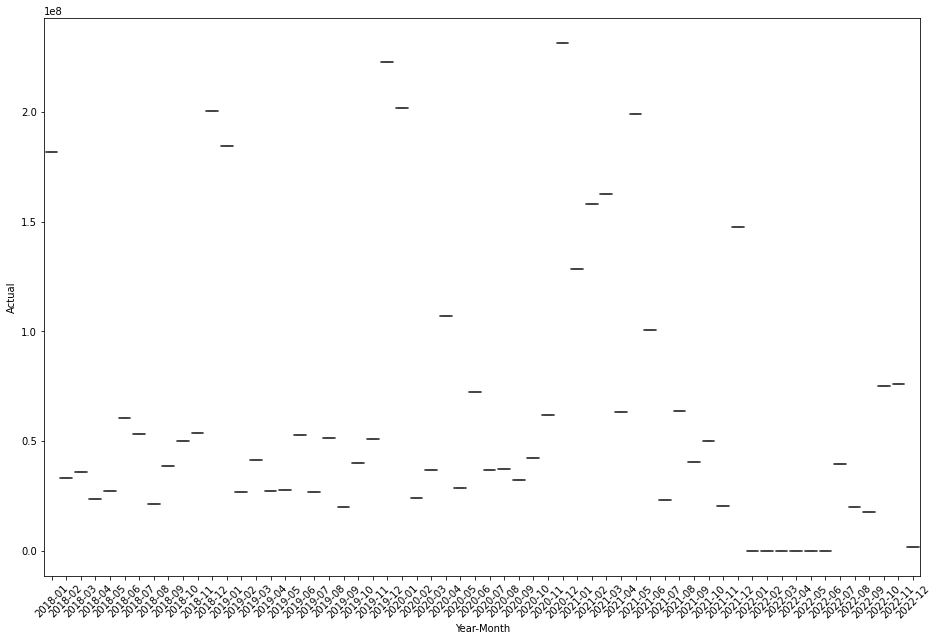

In [ ]:

#creating a box plot using Year-month columns
sns.boxplot(x = 'Year-Month', y='Actual', data = agg_rev_by_month)
from matplotlib import rcParams
import matplotlib.pyplot as plt


# figure size in inches
rcParams['figure.figsize'] = 15.7,10.27
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

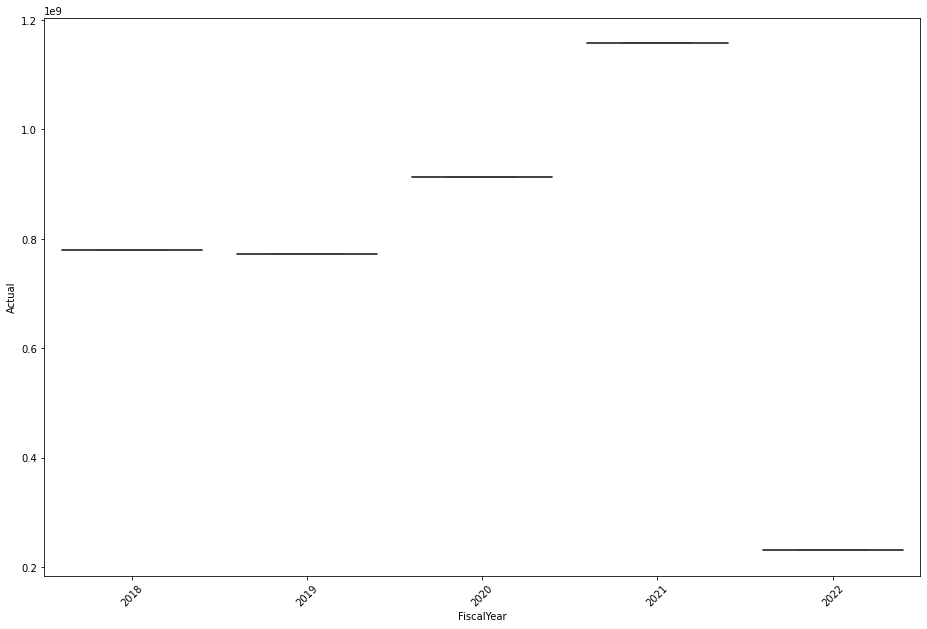

In [ ]:
#creating a box plot using Years
sns.boxplot(x = 'FiscalYear', y='Actual', data = agg_Revenues_Yearly)
from matplotlib import rcParams
import matplotlib.pyplot as plt


# figure size in inches
rcParams['figure.figsize'] = 15.7,10.27
plt.xticks(rotation=45)

Creating plots including Actual <0

In [ ]:
Beauf_SC_df['Month Number'] = Beauf_SC_df['FiscalMonth'].astype(str).str[:2]
Beauf_SC_df.head(2)

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number
0,RETAIL SALES,15399,Active,Revenue,15.0,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04
1,RETAIL SALES,15399,Active,Revenue,215.0,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08


In [ ]:
agg_rev_by_month_unf = Beauf_SC_df.groupby(['FiscalYear', 'Month Number'], as_index = False)['Actual'].sum()
agg_rev_by_month_unf.head(2)

,FiscalYear,Month Number,Actual
0,2018,01,1.816011e+08
1,2018,02,3.326058e+07


In [ ]:
agg_rev_by_month_unf['Year-Month'] = agg_rev_by_month_unf['FiscalYear'].astype(str) + '-' + agg_rev_by_month_unf['Month Number'].astype(str)

agg_rev_by_month_unf.head(2)

,FiscalYear,Month Number,Actual,Year-Month
0,2018,01,1.816011e+08,2018-01
1,2018,02,3.326058e+07,2018-02


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_rev_by_month_unf['Year-Month'].astype(dtype=str), 
                        y=agg_rev_by_month_unf['Actual'],
                        marker_color='indianred', text="Revenue"))
fig.update_layout({"title": 'Sales Tax Revenue by Month Beaufort, SC(Including Negative Values)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Revenues"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

In [ ]:
fig = go.Figure(data=go.Bar(x=agg_rev_by_month_unf['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month_unf['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month Beaufort, SC(Including Negative Values)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()

In [ ]:
agg_Revenues_Yearly_unf = Beauf_SC_df.groupby('FiscalYear', as_index= False)['Actual'].sum()
agg_Revenues_Yearly_unf.head(10)

,FiscalYear,Actual
0,2018,7.655333e+08
1,2019,7.670222e+08
2,2020,8.953633e+08
3,2021,1.131989e+09
4,2022,2.288554e+08


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_Revenues_Yearly_unf['FiscalYear'].astype(dtype=str), 
                        y=agg_Revenues_Yearly_unf['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sales Tax Revenue by Year Beaufort, SC (Including Sales Tax Revenue)',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

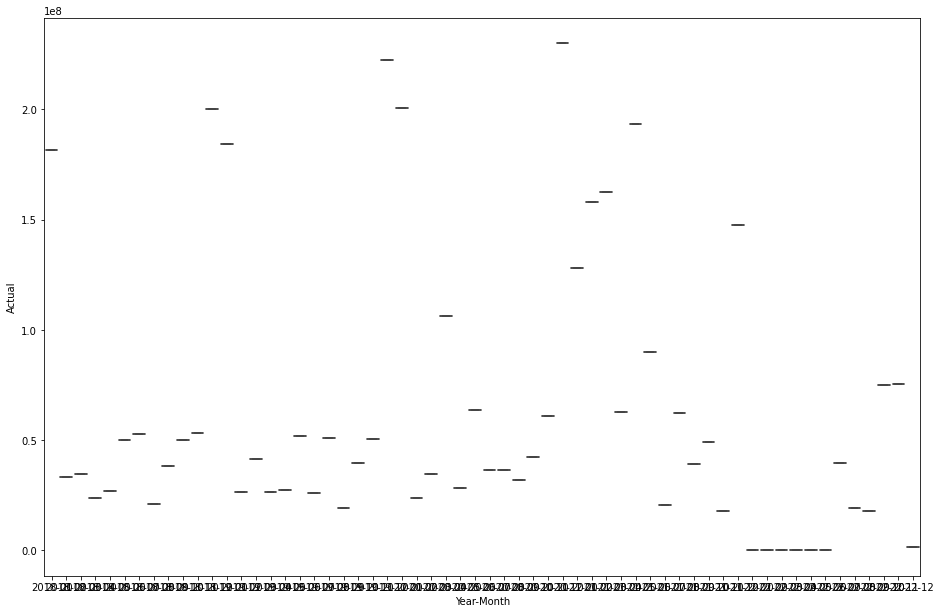

In [ ]:
#creating a box plot using Year-month columns
sns.boxplot(x = 'Year-Month', y='Actual', data = agg_rev_by_month_unf)


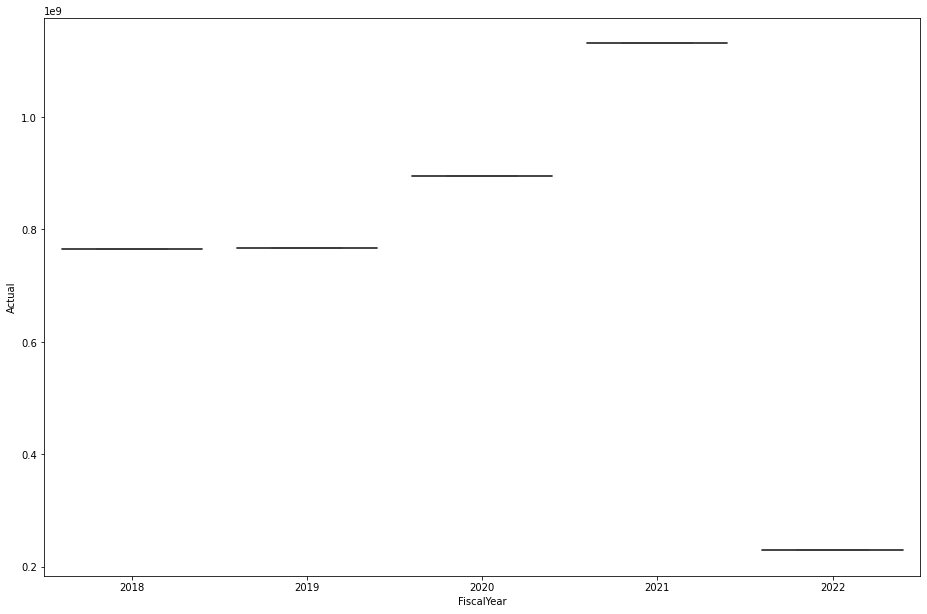

In [ ]:
#creating a box plot using Years
sns.boxplot(x = 'FiscalYear', y='Actual', data = agg_Revenues_Yearly_unf)


Aggregating amount by categories

In [ ]:
Beauf_SC_df

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number
0,RETAIL SALES,15399,Active,Revenue,15.00,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04
1,RETAIL SALES,15399,Active,Revenue,215.00,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08
2,RETAIL SALES,15399,Active,Revenue,20.00,CHARGES FOR SERVICES,City,05/01/2021 12:00:00 AM,2021,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2021-11-15399,05
3,RETAIL SALES,15399,Active,Revenue,6.00,CHARGES FOR SERVICES,City,08/01/2019 12:00:00 AM,2020,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-2-15399,08
4,RETAIL SALES,15399,Active,Revenue,12603.00,CHARGES FOR SERVICES,City,07/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-1-15399,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,TRUST FUNDS RECEIVED - SEX OFF,15887,Active,Revenue,450.00,MISCELLANEOUS,City,06/01/2019 12:00:00 AM,2019,2258-20-0001-000-00000-47504,SHERIFF DRUG TRUST,2258,2258,FEES FOR MARSHES AT LADYS ISLD,47504,SHERIFF DRUG TRUST,22580001,0.0,0.0,PUBLIC SAFETY,20,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-15887,06
22794,INTEREST ON INVESTMENTS,17433,Active,Revenue,292.66,INTEREST,City,06/01/2019 12:00:00 AM,2019,7701-05-0001-000-00000-46010,BURLINGTON LAND ROAD PAVING,7701,7701,INTEREST ON INVESTMENTS,46010,BURLINGTON LAND ROAD PAVING,77010001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-17433,06
22795,SCDDSN CONTRACT PEYTON,16185,Active,Revenue,20851.18,INTERGOVERNMENTAL,City,09/01/2018 12:00:00 AM,2019,2450-40-0001-000-00000-43532,DSN COMMUNITY TRAINING PROGRAM,2450,2450,SCDDSN CONTRACT PEYTON,43532,DSN COMMUNITY TRAINING PROGRAM,24500001,0.0,0.0,PUBLIC HEALTH,40,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-3-16185,09
22796,3% & 7% PENALTIES ON TAX,17138,Active,Revenue,396.37,AD VALOREM TAXES,City,01/01/2020 12:00:00 AM,2020,7073-05-0001-000-00000-41040,HHPSD #1 DEBT SERVICE,7073,7073,3% & 7% PENALTIES ON TAX,41040,HHPSD #1 DEBT SERVICE,70730001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-7-17138,01


In [ ]:
Beauf_SC_df['Segment4'].value_counts()

GENERIC                      21777
CULTURAL RECREATION SOUTH      576
CULTURAL RECREATION NORTH      365
'C' FUNDED PROJECTS             80
Name: Segment4, dtype: int64

In [ ]:
Beauf_SC_df['CharacterCodeDescription'].unique()

array(['CHARGES FOR SERVICES', 'AD VALOREM TAXES', 'LICENSES/PERMITS',
       'INTERGOVERNMENTAL', 'FINES & FORFEITURES', 'INTEREST',
       'MISCELLANEOUS', 'TRANSFERS IN', 'OTHER FIN SOURCES', 'UNKNOWN'],
      dtype=object)

In [ ]:
Beauf_SC_df['Segment2'].value_counts()

AGENCY                          8702
GENERAL GOVERNMENT              4781
CULTURAL & RECREATIONAL         2337
ENTERPRISE                      2256
PUBLIC HEALTH                   2184
PUBLIC SAFETY                    991
PUBLIC WORKS                     542
DEBT SERVICE                     403
PUBLIC WELFARE                   321
CAPITAL PROJECTS                 280
CENTRAL DEPOSITORY/REPORTING       1
Name: Segment2, dtype: int64

In [ ]:
agg_Revenues_cat = Beauf_SC_df.groupby('Segment2', as_index= False)['Actual'].sum()

In [ ]:
agg_Revenues_cat


,Segment2,Actual
0,AGENCY,2.506088e+09
1,CAPITAL PROJECTS,1.912863e+08
2,CENTRAL DEPOSITORY/REPORTING,4.985000e+03
3,CULTURAL & RECREATIONAL,2.416843e+07
4,DEBT SERVICE,7.602307e+07
5,ENTERPRISE,7.803552e+07
6,GENERAL GOVERNMENT,7.497382e+08
7,PUBLIC HEALTH,5.788695e+07
8,PUBLIC SAFETY,2.399543e+07
9,PUBLIC WELFARE,7.816183e+06


In [ ]:
fig = go.Figure(data=go.Bar(x=agg_Revenues_cat['Segment2'].astype(dtype=str), 
                        y= agg_Revenues_cat['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by  Category Beaufort, SC(Segment2)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


Making percentage bar graphs

In [ ]:
#making a bar chart on another 
agg_Revenues_cat_char_descr = Beauf_SC_df.groupby('CharacterCodeDescription', as_index= False)['Actual'].sum()

In [ ]:
agg_Revenues_cat_char_descr

,CharacterCodeDescription,Actual
0,AD VALOREM TAXES,1.975488e+09
1,CHARGES FOR SERVICES,1.623996e+08
2,FINES & FORFEITURES,5.933656e+06
3,INTEREST,1.766052e+07
4,INTERGOVERNMENTAL,6.896011e+08
5,LICENSES/PERMITS,4.390040e+07
6,MISCELLANEOUS,2.662886e+08
7,OTHER FIN SOURCES,5.613612e+08
8,TRANSFERS IN,6.612986e+07
9,UNKNOWN,0.000000e+00


In [ ]:
# fig = px.bar(new_df, x=col, y='Percent', color=target, 
#                     barmode='group', text='Percent')

In [ ]:
fig = go.Figure(data=go.Bar(x = agg_Revenues_cat_char_descr['CharacterCodeDescription'].astype(dtype=str), 
                        y = agg_Revenues_cat_char_descr['Actual'],
                        marker_color='indianred', text='Percent'))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by  Category In Beaufort, SC(CharacterCodeDescription)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:
Beauf_SC_df['AccountDescription'].unique()

In [ ]:
Beauf_SC_df['Segment3'].unique()

array(['REVENUES', 'REVENUES - CULTURAL-RECREATION',
       'ECON DEVELOPMENT BOARD', 'EXPENDITURES',
       'PUBLIC WORKS GEN SUPPORT', 'Transportation Engineering',
       'EMERGENCY MEDICAL SERVICE', 'ENGINEERING'], dtype=object)

In [ ]:
agg_Revenues_cat_seg3 = Beauf_SC_df.groupby('Segment3', as_index= False)['Actual'].sum()


In [ ]:
agg_Revenues_cat_seg3

,Segment3,Actual
0,ECON DEVELOPMENT BOARD,4.900000e+05
1,EMERGENCY MEDICAL SERVICE,8.918500e+03
2,ENGINEERING,7.000000e+02
3,EXPENDITURES,1.387181e+05
4,PUBLIC WORKS GEN SUPPORT,1.865892e+07
5,REVENUES,3.767773e+09
6,REVENUES - CULTURAL-RECREATION,1.690326e+06
7,Transportation Engineering,2.850000e+03


In [ ]:
# df_stack['Percentage']=df.groupby(['Segment3'])['Actual'].size().groupby(level=0).apply(lambda 
#         x:100 * x/float(x.sum())).values
fig = go.Figure(data=go.Bar(x = agg_Revenues_cat_seg3['Segment3'].astype(dtype=str), 
                        y = agg_Revenues_cat_seg3['Actual'],
                        marker_color='indianred', text='Percent'))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by  Category In Beaufort, SC',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:
Beauf_SC_df.head(2)

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number
0,RETAIL SALES,15399,Active,Revenue,15.0,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04
1,RETAIL SALES,15399,Active,Revenue,215.0,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08


In [ ]:
Beauf_SC_df['Month Number'] = Beauf_SC_df['FiscalMonth'].str[:2]

In [ ]:
Beauf_SC_df

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number
0,RETAIL SALES,15399,Active,Revenue,15.00,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04
1,RETAIL SALES,15399,Active,Revenue,215.00,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08
2,RETAIL SALES,15399,Active,Revenue,20.00,CHARGES FOR SERVICES,City,05/01/2021 12:00:00 AM,2021,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2021-11-15399,05
3,RETAIL SALES,15399,Active,Revenue,6.00,CHARGES FOR SERVICES,City,08/01/2019 12:00:00 AM,2020,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-2-15399,08
4,RETAIL SALES,15399,Active,Revenue,12603.00,CHARGES FOR SERVICES,City,07/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-1-15399,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,TRUST FUNDS RECEIVED - SEX OFF,15887,Active,Revenue,450.00,MISCELLANEOUS,City,06/01/2019 12:00:00 AM,2019,2258-20-0001-000-00000-47504,SHERIFF DRUG TRUST,2258,2258,FEES FOR MARSHES AT LADYS ISLD,47504,SHERIFF DRUG TRUST,22580001,0.0,0.0,PUBLIC SAFETY,20,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-15887,06
22794,INTEREST ON INVESTMENTS,17433,Active,Revenue,292.66,INTEREST,City,06/01/2019 12:00:00 AM,2019,7701-05-0001-000-00000-46010,BURLINGTON LAND ROAD PAVING,7701,7701,INTEREST ON INVESTMENTS,46010,BURLINGTON LAND ROAD PAVING,77010001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-17433,06
22795,SCDDSN CONTRACT PEYTON,16185,Active,Revenue,20851.18,INTERGOVERNMENTAL,City,09/01/2018 12:00:00 AM,2019,2450-40-0001-000-00000-43532,DSN COMMUNITY TRAINING PROGRAM,2450,2450,SCDDSN CONTRACT PEYTON,43532,DSN COMMUNITY TRAINING PROGRAM,24500001,0.0,0.0,PUBLIC HEALTH,40,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-3-16185,09
22796,3% & 7% PENALTIES ON TAX,17138,Active,Revenue,396.37,AD VALOREM TAXES,City,01/01/2020 12:00:00 AM,2020,7073-05-0001-000-00000-41040,HHPSD #1 DEBT SERVICE,7073,7073,3% & 7% PENALTIES ON TAX,41040,HHPSD #1 DEBT SERVICE,70730001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-7-17138,01


In [ ]:
Beauf_SC_df['Year-Month'] = Beauf_SC_df['FiscalYear'].astype(str) + '-' + Beauf_SC_df['Month Number'].astype(str)
Beauf_SC_df.head(2)

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number,Year-Month
0,RETAIL SALES,15399,Active,Revenue,15.0,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04,2019-04
1,RETAIL SALES,15399,Active,Revenue,215.0,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08,2019-08


In [ ]:
total_amount_cat = Beauf_SC_df.groupby(['Segment2', 'Year-Month'], as_index = False)['Actual'].sum()


In [ ]:

px.line(total_amount_cat, 
        x="Year-Month", 
        y="Actual", 
        color="Segment2", 
        #text="Revenue",
       title="Plotting Revenue by Category over time(Year-Month")


In [ ]:
filtered_beauf

,AccountDescription,AccountId,AccountStatus,AccountType,Actual,CharacterCodeDescription,Entity,FiscalMonth,FiscalYear,FullAccount,Fund,FundCode,FundGroup,Object,ObjectCode,Organization,OrganizationCode,OriginalBudget,RevisedBudget,Segment2,Segment2Code,Segment3,Segment3Code,Segment4,Segment4Code,Segment5,Segment5Code,Segment6Code,Segment7Code,Segment8Code,UniqueId,Month Number
0,RETAIL SALES,15399,Active,Revenue,15.00,CHARGES FOR SERVICES,City,04/01/2019 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-10-15399,04
1,RETAIL SALES,15399,Active,Revenue,215.00,CHARGES FOR SERVICES,City,08/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-2-15399,08
2,RETAIL SALES,15399,Active,Revenue,20.00,CHARGES FOR SERVICES,City,05/01/2021 12:00:00 AM,2021,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2021-11-15399,05
3,RETAIL SALES,15399,Active,Revenue,6.00,CHARGES FOR SERVICES,City,08/01/2019 12:00:00 AM,2020,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-2-15399,08
4,RETAIL SALES,15399,Active,Revenue,12603.00,CHARGES FOR SERVICES,City,07/01/2018 12:00:00 AM,2019,0602-60-0001-000-00000-44481,PALS BASEBALL TOURNAMENTS,602,0602,Scoops,44481,PALS BASEBALL TOURNAMENTS,6020001,0.0,0.0,CULTURAL & RECREATIONAL,60,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-1-15399,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22793,TRUST FUNDS RECEIVED - SEX OFF,15887,Active,Revenue,450.00,MISCELLANEOUS,City,06/01/2019 12:00:00 AM,2019,2258-20-0001-000-00000-47504,SHERIFF DRUG TRUST,2258,2258,FEES FOR MARSHES AT LADYS ISLD,47504,SHERIFF DRUG TRUST,22580001,0.0,0.0,PUBLIC SAFETY,20,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-15887,06
22794,INTEREST ON INVESTMENTS,17433,Active,Revenue,292.66,INTEREST,City,06/01/2019 12:00:00 AM,2019,7701-05-0001-000-00000-46010,BURLINGTON LAND ROAD PAVING,7701,7701,INTEREST ON INVESTMENTS,46010,BURLINGTON LAND ROAD PAVING,77010001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-12-17433,06
22795,SCDDSN CONTRACT PEYTON,16185,Active,Revenue,20851.18,INTERGOVERNMENTAL,City,09/01/2018 12:00:00 AM,2019,2450-40-0001-000-00000-43532,DSN COMMUNITY TRAINING PROGRAM,2450,2450,SCDDSN CONTRACT PEYTON,43532,DSN COMMUNITY TRAINING PROGRAM,24500001,0.0,0.0,PUBLIC HEALTH,40,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2019-3-16185,09
22796,3% & 7% PENALTIES ON TAX,17138,Active,Revenue,396.37,AD VALOREM TAXES,City,01/01/2020 12:00:00 AM,2020,7073-05-0001-000-00000-41040,HHPSD #1 DEBT SERVICE,7073,7073,3% & 7% PENALTIES ON TAX,41040,HHPSD #1 DEBT SERVICE,70730001,0.0,0.0,AGENCY,5,REVENUES,1,GENERIC,000,UNKNOWN,0,-1,-1,-1,2020-7-17138,01


In [ ]:
filtered_beauf['Year-Month'] = filtered_beauf['FiscalYear'].astype(str) + '-' + filtered_beauf['Month Number'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
total_amount_cat_filt = Beauf_SC_df.groupby(['Segment2', 'Year-Month'], as_index = False)['Actual'].sum()
total_amount_cat_filt

,Segment2,Year-Month,Actual
0,AGENCY,2018-01,1.217335e+08
1,AGENCY,2018-02,1.586326e+07
2,AGENCY,2018-03,1.632536e+07
3,AGENCY,2018-04,1.657495e+07
4,AGENCY,2018-05,1.652525e+07
...,...,...,...
535,PUBLIC WORKS,2022-08,3.533018e+05
536,PUBLIC WORKS,2022-09,7.775656e+05
537,PUBLIC WORKS,2022-10,4.429789e+05
538,PUBLIC WORKS,2022-11,4.091778e+05


In [ ]:
px.line(total_amount_cat_filt, 
        x="Year-Month", 
        y="Actual", 
        color="Segment2", 
        #text="Revenue",
       title="Plotting Revenue by Category over time(Year-Month")


PLotting the actual difference for filtered and unfiltered.

#Fontana, CA (ERP) -Using for Modeling(Filter out dates before u start to model)

In [ ]:
fontana_ca_df = pd.read_csv('Budgeted_Revenues_fontana.csv')
fontana_ca_df.head(10)

,UniqueId,AccountId,Entity,CharacterCode,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,ProjectCode,Project,FullAccount,FundCode,Fund,Segment2Code,Segment2,Segment3Code,Segment3,Segment4Code,Segment4,Segment5Code,Segment5,Segment6Code,Segment6,Segment7Code,Segment7,Segment8Code,Segment8,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,Department,DepartmentGroup,FunctionDescription,FunctionGroup,FundGroup,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear
0,2018-1-10696,10696,City,51,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,NaN,UNKNOWN,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,1COF,City of Fontana,3PW,Public Works,3DSO,Development Services,38PW,Public Works,382PL,Parks & Landscape,09PL,Landscape Maintenance,0,No location,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,500.0,False
1,2018-1-10713,10713,City,62,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,NaN,UNKNOWN,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),1COF,City of Fontana,3PW,Public Works,3DSO,Development Services,38PW,Public Works,381OP,Utilities & Street,99US,Projects/Grants,0,No location,Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,1210410.0,False
2,2018-1-10915,10915,City,69,Transfers In,6900,Operating Transfers In,60126199,Information Systems,NaN,UNKNOWN,601-1COF-1GG-2ASO-26IT-261IT-99IT-00-6900-,601,Capital Reinvestment,1COF,City of Fontana,1GG,General Government,2ASO,Administrative Services,26IT,Information Technology,261IT,Applications,99IT,Projects/Grants,0,No location,Operating Transfers In,Revenue,Active,2018,07/01/2017 12:00:00 AM,0,1000000.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,1000000.0,False
3,2018-1-3941,3941,City,51,Property Tax,5010,Current Sec & Unsec,10128000,Management Services,NaN,UNKNOWN,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5010-,101,General Fund,1COF,City of Fontana,1GG,General Government,2ASO,Administrative Services,28MS,Management Services,280MS,Management Services,00MS,Administration,0,No location,Current Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,2591000,2591000.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,2591000.0,False
4,2018-1-3942,3942,City,51,Property Tax,5010,Current Sec & Unsec,21050000,Fire District Administration,NaN,UNKNOWN,210-2FFD-2PS-5FFD-50FD-500FD-00FD-00-5010-,210,Fontana Fire District,2FFD,Fontana Fire District,2PS,Public Safety,5FFD,Fire,50FD,Fire,500FD,Fire,00FD,Administration,0,No location,Current Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,17500000,17500000.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,17500000.0,False
5,2018-1-3943,3943,City,51,Property Tax,5011,Current Supplemental,10128000,Management Services,NaN,UNKNOWN,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5011-,101,General Fund,1COF,City of Fontana,1GG,General Government,2ASO,Administrative Services,28MS,Management Services,280MS,Management Services,00MS,Administration,0,No location,Current Supplemental,Revenue,Active,2018,07/01/2017 12:00:00 AM,55000,55000.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,55000.0,False
6,2018-1-3945,3945,City,51,Property Tax,5012,Prior Sec & Unsec,10128000,Management Services,NaN,UNKNOWN,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5012-,101,General Fund,1COF,City of Fontana,1GG,General Government,2ASO,Administrative Services,28MS,Management Services,280MS,Management Services,00MS,Administration,0,No location,Prior Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,110000,110000.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,110000.0,False
7,2018-1-3946,3946,City,51,Property Tax,5013,Prior Supplemental,10128000,Management Services,NaN,UNKNOWN,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5013-,101,General Fund,1COF,City of Fontana,1GG,General Government,2ASO,Administrative Services,28MS,Management Services,280MS,Management Services,00MS,Admi

In [ ]:
fontana_ca_df.shape[0]

15898

In [ ]:
fontana_ca_df.tail(10)

,UniqueId,AccountId,Entity,CharacterCode,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,ProjectCode,Project,FullAccount,FundCode,Fund,Segment2Code,Segment2,Segment3Code,Segment3,Segment4Code,Segment4,Segment5Code,Segment5,Segment6Code,Segment6,Segment7Code,Segment7,Segment8Code,Segment8,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,Department,DepartmentGroup,FunctionDescription,FunctionGroup,FundGroup,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear
15888,2022-6-4684,4684,City,64,Other Revenue,6450,Miscellaneous Income,70128500,Sewer Billing,NaN,UNKNOWN,701-1COF-7ET-2ASO-28MS-285CS-00MS-00-6450-,701,Sewer Maint & Operations,1COF,City of Fontana,7ET,Enterprise,2ASO,Administrative Services,28MS,Management Services,285CS,Customer Service,00MS,Administration,0,No location,Miscellaneous Income,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,-6460.00,NaN,NaN,NaN,NaN,NaN,0,0,0,-6460.00,6460.00,False
15889,2022-6-4702,4702,City,65,Reimbursable,6475,Reimb Exp - Police,10140100,Administrative Services,NaN,UNKNOWN,101-1COF-2PS-4POL-40PD-401PD-00PD-00-6475-,101,General Fund,1COF,City of Fontana,2PS,Public Safety,4POL,Police,40PD,Police,401PD,PD Administration,00PD,Administration,0,No location,Reimb Exp - Police,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,75.00,NaN,NaN,NaN,NaN,NaN,0,0,0,75.00,-75.00,False
15890,2022-6-4713,4713,City,65,Reimbursable,6478,Reimb Exp - Weed Abatemn,10140359,Weed Abatement,NaN,UNKNOWN,101-1COF-2PS-4POL-40PD-403SO-59PD-00-6478-,101,General Fund,1COF,City of Fontana,2PS,Public Safety,4POL,Police,40PD,Police,403SO,Special Operations,59PD,Weed Abatement,0,No location,Reimb Exp - Weed Abatemn,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,3327.45,NaN,NaN,NaN,NaN,NaN,0,0,0,3327.45,-3327.45,False
15891,2022-6-4720,4720,City,65,Reimbursable,6480,Miscellaneous Reimb,10128000,Management Services,NaN,UNKNOWN,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-6480-,101,General Fund,1COF,City of Fontana,1GG,General Government,2ASO,Administrative Services,28MS,Management Services,280MS,Management Services,00MS,Administration,0,No location,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1056.43,NaN,NaN,NaN,NaN,NaN,0,0,0,1056.43,-1056.43,False
15892,2022-6-4732,4732,City,65,Reimbursable,6480,Miscellaneous Reimb,10140356,F.A.S.T.,NaN,UNKNOWN,101-1COF-2PS-4POL-40PD-403SO-56PD-00-6480-,101,General Fund,1COF,City of Fontana,2PS,Public Safety,4POL,Police,40PD,Police,403SO,Special Operations,56PD,F.A.S.T.,0,No location,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,5.00,NaN,NaN,NaN,NaN,NaN,0,0,0,5.00,-5.00,False
15893,2022-6-4733,4733,City,65,Reimbursable,6480,Miscellaneous Reimb,10140357,Community Improvement,NaN,UNKNOWN,101-1COF-2PS-4POL-40PD-403SO-57PD-00-6480-,101,General Fund,1COF,City of Fontana,2PS,Public Safety,4POL,Police,40PD,Police,403SO,Special Operations,57PD,Community Improvement,0,No location,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,42114.31,NaN,NaN,NaN,NaN,NaN,0,0,0,42114.31,-42114.31,False
15894,2022-6-4752,4752,City,65,Reimbursable,6482,Reimb Exp - Retirees,10715002,Retiree Medical Benefits,NaN,UNKNOWN,107-1COF-1GG-1CAO-15HR-150HR-02HR-00-6482-,107,Retiree Medical Benefits,1COF,City of Fontana,1GG,General Government,1CAO,City Administration,15HR,Human Resources,150HR,HR Admin,02HR,Workers Comp,0,No location,Reimb Exp - Retirees,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,10998.89,NaN,NaN,NaN,NaN,NaN,0,0,0,10998.89,-10998.89,False
15895,2022-6-4753,4753,City,65,Reimbursable,6483,Reimb Exp - Personnel,10140226,Investigations,NaN,UNKNOWN,101-1COF-2PS-4POL-40PD-402FS-26PD-00-6483-,101,General Fund,1COF,City of Fontana,2PS,Public Safety,4POL,Police,40PD,Police,402FS,Field Services,26PD,Investigations,0,No location,Reimb Exp - Personnel,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1598.35,NaN,NaN,NaN,NaN,NaN,0,0,0,1598.35,

Exploring null Values

In [ ]:
fontana_ca_df = fontana_ca_df.drop(['FunctionDescription', 'DepartmentGroup', 'Department', 'ProjectCode', 'FunctionGroup', 'Project', 'Segment6', 'Segment7', 'Segment8', 'CharacterCode', 'FundGroup',
                                'Segment2Code', 'Segment2', 'Segment3Code', 'Segment3', 'Segment4Code', 'Segment4', 'Segment5Code', 'Segment5', 'Segment6Code', 'Segment7Code', 'Segment8Code'], axis =1)
fontana_ca_df

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.00,0,0,0,0.00,500.00,False
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.00,0,0,0,0.00,1210410.00,False
2,2018-1-10915,10915,City,Transfers In,6900,Operating Transfers In,60126199,Information Systems,601-1COF-1GG-2ASO-26IT-261IT-99IT-00-6900-,601,Capital Reinvestment,Operating Transfers In,Revenue,Active,2018,07/01/2017 12:00:00 AM,0,1000000.0,0.00,0,0,0,0.00,1000000.00,False
3,2018-1-3941,3941,City,Property Tax,5010,Current Sec & Unsec,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5010-,101,General Fund,Current Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,2591000,2591000.0,0.00,0,0,0,0.00,2591000.00,False
4,2018-1-3942,3942,City,Property Tax,5010,Current Sec & Unsec,21050000,Fire District Administration,210-2FFD-2PS-5FFD-50FD-500FD-00FD-00-5010-,210,Fontana Fire District,Current Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,17500000,17500000.0,0.00,0,0,0,0.00,17500000.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,2022-6-4733,4733,City,Reimbursable,6480,Miscellaneous Reimb,10140357,Community Improvement,101-1COF-2PS-4POL-40PD-403SO-57PD-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,42114.31,0,0,0,42114.31,-42114.31,False
15894,2022-6-4752,4752,City,Reimbursable,6482,Reimb Exp - Retirees,10715002,Retiree Medical Benefits,107-1COF-1GG-1CAO-15HR-150HR-02HR-00-6482-,107,Retiree Medical Benefits,Reimb Exp - Retirees,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,10998.89,0,0,0,10998.89,-10998.89,False
15895,2022-6-4753,4753,City,Reimbursable,6483,Reimb Exp - Personnel,10140226,Investigations,101-1COF-2PS-4POL-40PD-402FS-26PD-00-6483-,101,General Fund,Reimb Exp - Personnel,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1598.35,0,0,0,1598.35,-1598.35,False
15896,2022-6-4764,4764,City,Sales of Assets,6610,Gain/Loss On Vehicle Dis,75138305,Fleet Maintenance,751-1COF-8IS-3DSO-38PW-383SS-05SS-00-6610-,751,Fleet Operations,Gain/Loss On Vehicle Dis,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,78396.00,0,0,0,78396.00,-78396.00,False


In [ ]:
null_df = fontana_ca_df[fontana_ca_df.isna().any(axis =1)]


In [ ]:
null_df

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear


In [ ]:
null_df.shape

(0, 25)

In [ ]:
fontana_ca_df.shape

(15898, 25)

Dates: July 2017 to December 2021 

In [ ]:
fontana_ca_df_filtered  =  fontana_ca_df[fontana_ca_df['Actual'] > 0]
fontana_ca_df_filtered.shape

(11813, 25)

In [ ]:
fontana_ca_df_filtered['FiscalMonth'].unique()

array(['06/01/2018 12:00:00 AM', '04/01/2019 12:00:00 AM',
       '05/01/2019 12:00:00 AM', '06/01/2019 12:00:00 AM',
       '07/01/2019 12:00:00 AM', '04/01/2020 12:00:00 AM',
       '05/01/2020 12:00:00 AM', '06/01/2020 12:00:00 AM',
       '08/01/2019 12:00:00 AM', '09/01/2019 12:00:00 AM',
       '10/01/2019 12:00:00 AM', '11/01/2019 12:00:00 AM',
       '12/01/2019 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '02/01/2020 12:00:00 AM', '03/01/2020 12:00:00 AM',
       '07/01/2020 12:00:00 AM', '04/01/2021 12:00:00 AM',
       '05/01/2021 12:00:00 AM', '06/01/2021 12:00:00 AM',
       '08/01/2020 12:00:00 AM', '09/01/2020 12:00:00 AM',
       '10/01/2020 12:00:00 AM', '11/01/2020 12:00:00 AM',
       '12/01/2020 12:00:00 AM', '01/01/2021 12:00:00 AM',
       '02/01/2021 12:00:00 AM', '03/01/2021 12:00:00 AM',
       '07/01/2021 12:00:00 AM', '08/01/2021 12:00:00 AM',
       '09/01/2021 12:00:00 AM', '10/01/2021 12:00:00 AM',
       '11/01/2021 12:00:00 AM', '12/01/2021 12:00:00 AM

In [ ]:
fontana_ca_df.shape[0] - fontana_ca_df_filtered.shape[0]

4085

We have a concerningly large number of rows where the Actual values are less than zero. 

In [ ]:
fontana_ca_df_filtered['Month Number'] = fontana_ca_df_filtered['FiscalMonth'].astype(str).str[:2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#aggregate the data by [month, year]
agg_rev_by_month = fontana_ca_df_filtered.groupby(['FiscalYear', 'Month Number'], as_index= False)['Actual'].sum()
agg_rev_by_month.head(2)


,FiscalYear,Month Number,Actual
0,2018,06,6.199486e+08
1,2019,04,3.095871e+08


In [ ]:
agg_rev_by_month['Year-Month'] = agg_rev_by_month['FiscalYear'].astype(str) + '-' + agg_rev_by_month['Month Number'].astype(str)

agg_rev_by_month.head(2)

,FiscalYear,Month Number,Actual,Year-Month
0,2018,06,6.199486e+08,2018-06
1,2019,04,3.095871e+08,2019-04


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_rev_by_month['Year-Month'].astype(dtype=str), 
                        y=agg_rev_by_month['Actual'],
                        marker_color='indianred', text="Revenue"))
fig.update_layout({"title": 'Sales Tax Revenue by Month Fontana, CA',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Revenues"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

In [ ]:
fig = go.Figure(data=go.Bar(x=agg_rev_by_month['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month, Fontana CA ',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()

This graph shows us that we should Filter out the dates so that it only includes Jan 2020 go December 2021

In [ ]:
#grouping by year
agg_Revenues_Yearly = fontana_ca_df_filtered.groupby('FiscalYear', as_index= False)['Actual'].sum()
agg_Revenues_Yearly.head(2)



,FiscalYear,Actual
0,2018,6.199486e+08
1,2019,4.383598e+08


In [ ]:

import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_Revenues_Yearly['FiscalYear'].astype(dtype=str), 
                        y=agg_Revenues_Yearly['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sales Tax Revenue by Year Fontana CA',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

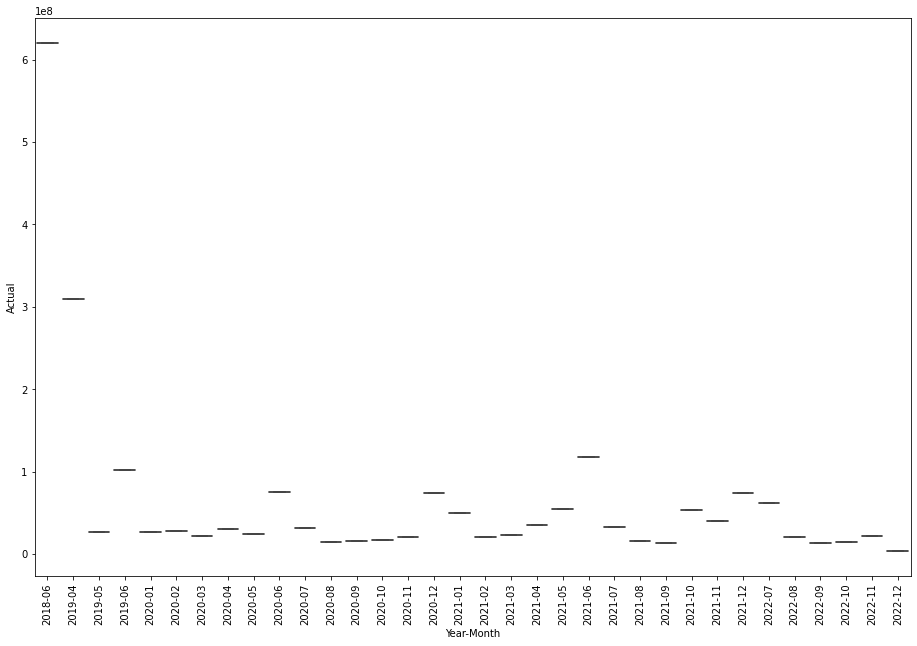

In [ ]:

#creating a box plot using Year-month columns
sns.boxplot(x = 'Year-Month', y='Actual', data = agg_rev_by_month)

import matplotlib.pyplot as plt

plt.xticks(rotation = 90)

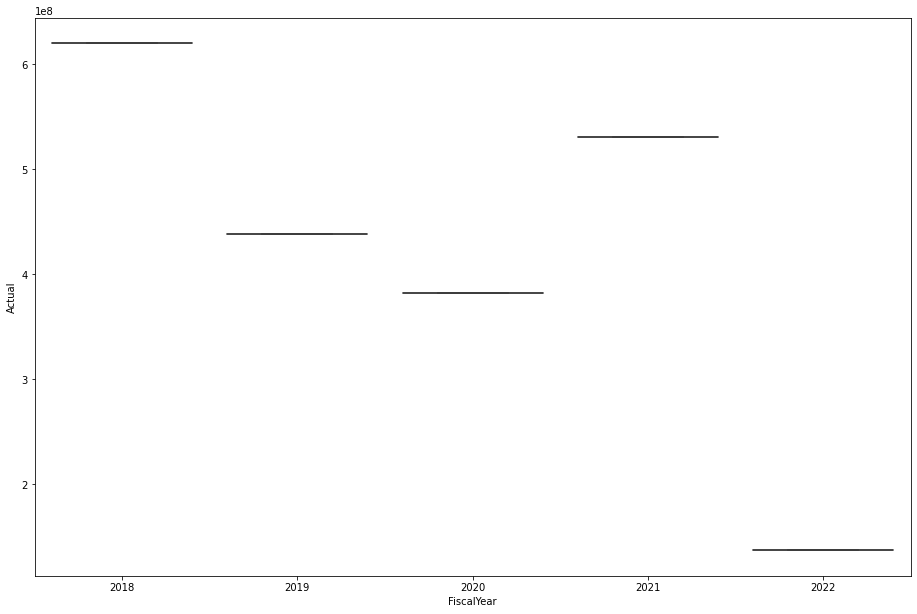

In [ ]:

#creating a box plot using Years
sns.boxplot(x = 'FiscalYear', y='Actual', data = agg_Revenues_Yearly)



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text major ticklabel objects>)

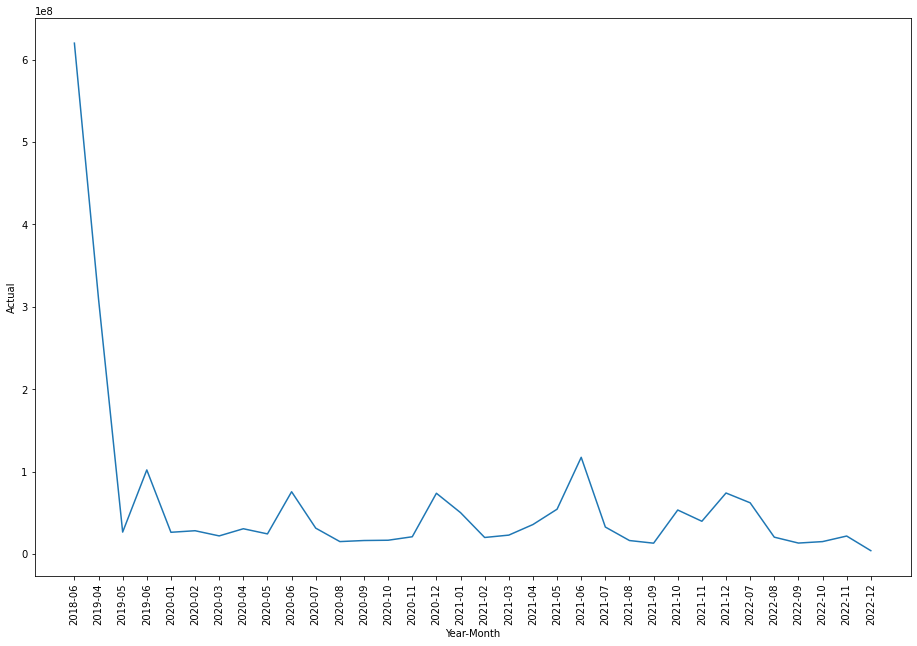

In [ ]:
# plotting with confidence intervals 
sns.lineplot(x="Year-Month", y="Actual", data = agg_rev_by_month)
import matplotlib.pyplot as plt

plt.xticks(rotation = 90)

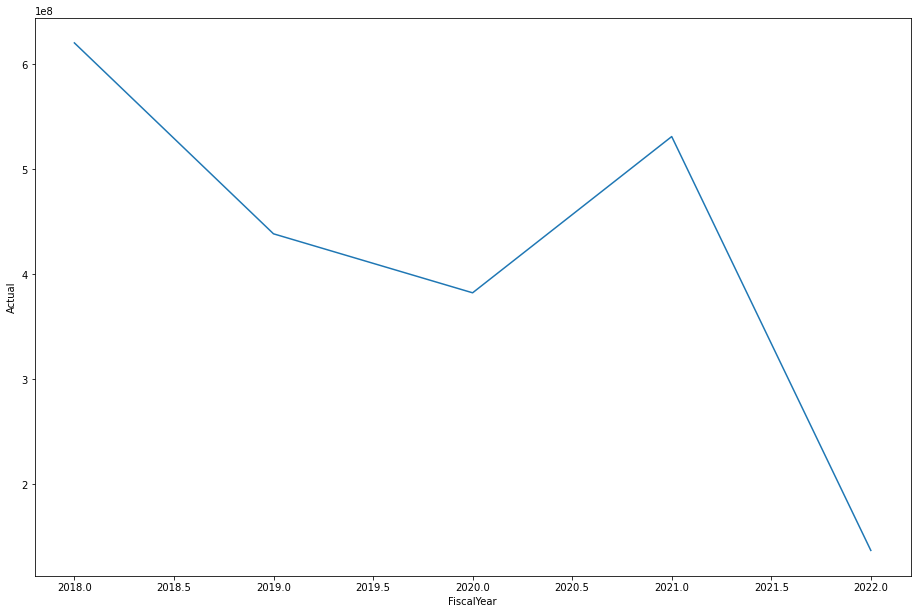

In [ ]:

# plotting with confidence intervals 
sns.lineplot(x="FiscalYear", y="Actual", data = agg_Revenues_Yearly)





Plotting Graphs including where actual < 0.

In [ ]:
fontana_ca_df.head(2)

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.0,0,0,0,0.0,500.0,False
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.0,0,0,0,0.0,1210410.0,False


In [ ]:
fontana_ca_df['Month Number'] = fontana_ca_df['FiscalMonth'].astype(str).str[:2]

In [ ]:
#aggregate the data by [month, year]
agg_rev_by_month_unf_font = fontana_ca_df.groupby(['FiscalYear', 'Month Number'], as_index= False)['Actual'].sum()
agg_rev_by_month_unf_font.head(2)


,FiscalYear,Month Number,Actual
0,2018,06,618155517.3
1,2018,07,0.0


In [ ]:
agg_rev_by_month_unf_font['Year-Month'] = agg_rev_by_month_unf_font['FiscalYear'].astype(str) + '-' + agg_rev_by_month_unf_font['Month Number'].astype(str)
agg_rev_by_month_unf_font.head(2)

,FiscalYear,Month Number,Actual,Year-Month
0,2018,06,618155517.3,2018-06
1,2018,07,0.0,2018-07


In [ ]:
fig = go.Figure(data=go.Bar(x=agg_rev_by_month_unf_font['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month_unf_font['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month in Albany ',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


Lets filter out the dates in the dataset to Jan 2020 to Dec 2021 before we perform the modeling

In [ ]:

#grouping by year
agg_Revenues_Yearly_fon = fontana_ca_df.groupby('FiscalYear', as_index= False)['Actual'].sum()
agg_Revenues_Yearly_fon.head(10)



,FiscalYear,Actual
0,2018,6.181555e+08
1,2019,4.118071e+08
2,2020,3.593767e+08
3,2021,4.650785e+08
4,2022,1.365572e+08


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_Revenues_Yearly_fon['FiscalYear'].astype(dtype=str), 
                        y=agg_Revenues_Yearly_fon['Actual'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sales Tax Revenue by Year',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

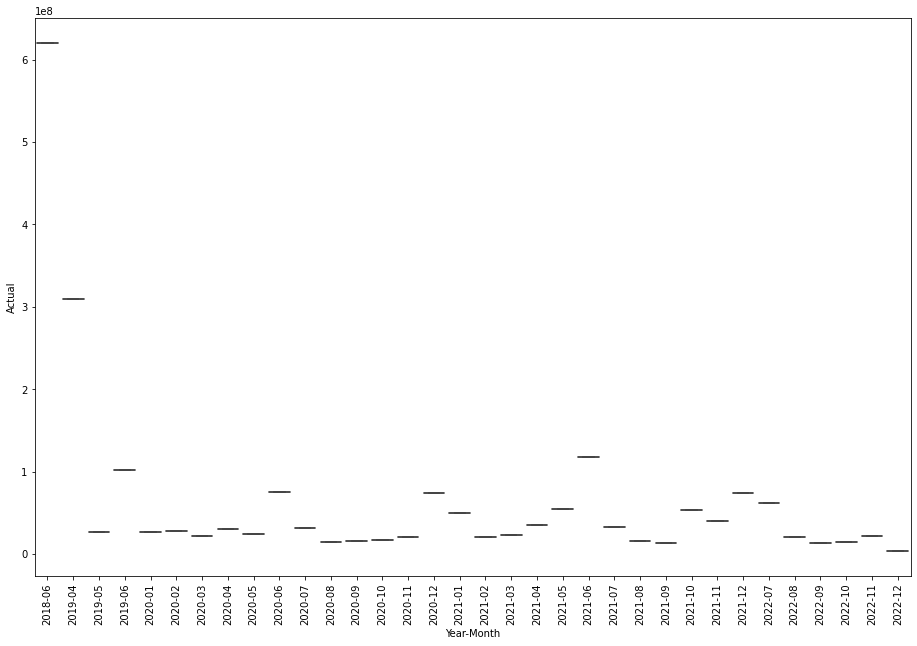

In [ ]:
#creating a box plot using Year-month columns
sns.boxplot(x = 'Year-Month', y='Actual', data = agg_rev_by_month)
import matplotlib.pyplot as plt

plt.xticks(rotation = 90)


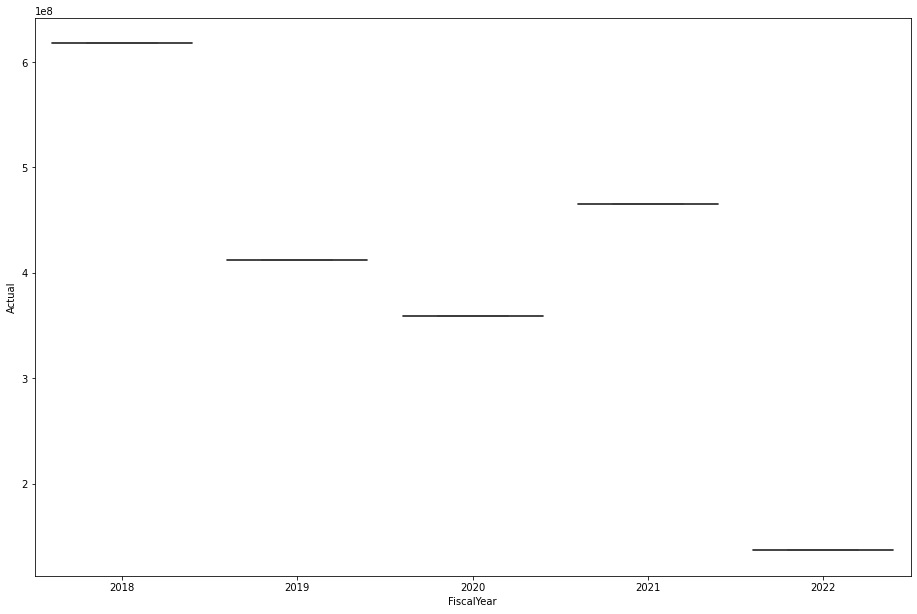

In [ ]:
#creating a box plot using Years
sns.boxplot(x = 'FiscalYear', y='Actual', data = agg_Revenues_Yearly_fon)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text major ticklabel objects>)

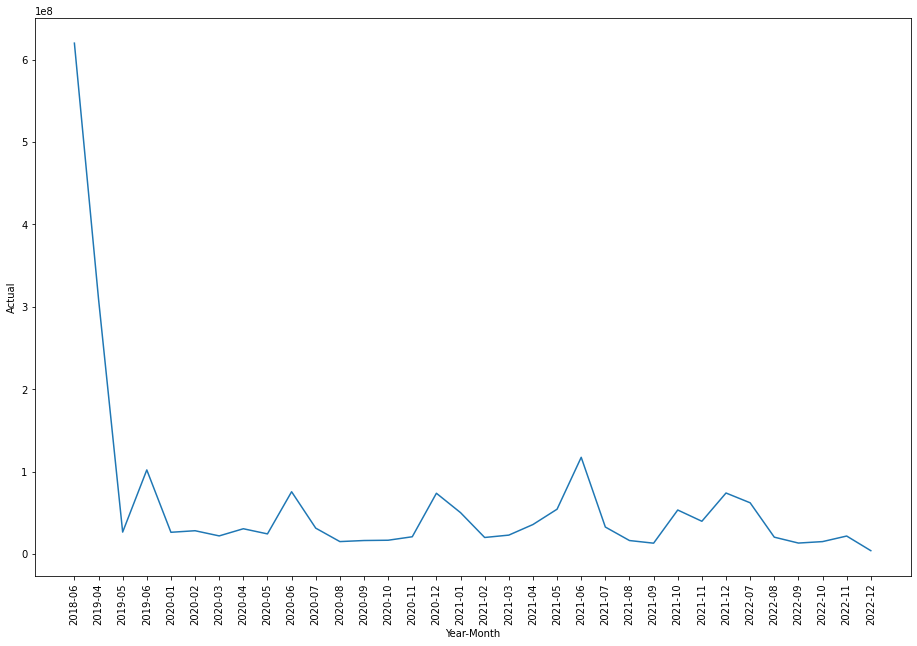

In [ ]:
# plotting with confidence intervals 
sns.lineplot(x="Year-Month", y="Actual", data = agg_rev_by_month)
import matplotlib.pyplot as plt

plt.xticks(rotation = 90)


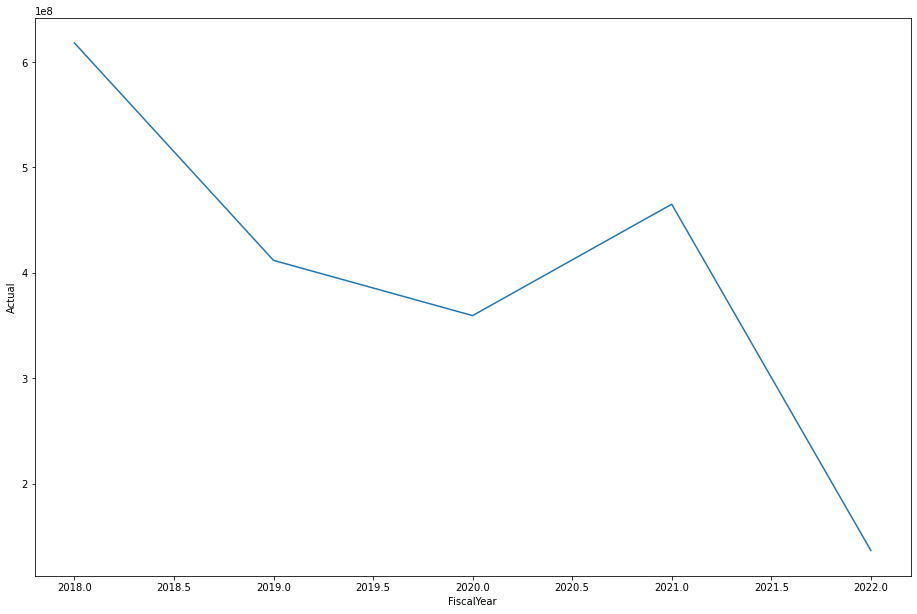

In [ ]:
# plotting with confidence intervals 
sns.lineplot(x="FiscalYear", y="Actual", data = agg_Revenues_Yearly_fon)


Modeling(EDA/Data Pre-processing)

*   Filter out the days
*   Trend Decomposition
*   List item
*   List item





Aggrgating by Subcategories

In [ ]:
fontana_ca_df.head(2)

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.0,0,0,0,0.0,500.0,False,07
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.0,0,0,0,0.0,1210410.0,False,07


In [ ]:
fontana_ca_df['Entity'].unique()

array(['City'], dtype=object)

In [ ]:
fontana_ca_df['Organization'].unique()

In [ ]:
fontana_ca_df['CharacterCodeDescription'].unique()

In [ ]:
fontana_ca_df.shape

(15898, 26)

In [ ]:
fontana_ca_df['Actual'].sum().round(2)

1990975050.06

In [ ]:
fontana_sales_tax = fontana_ca_df[fontana_ca_df['CharacterCodeDescription'] == 'Sales Tax']
fontana_sales_tax

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number
51,2018-1-4018,4018,City,Sales Tax,5060,Sales Tax,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5060-,101,General Fund,Sales Tax,Revenue,Active,2018,07/01/2017 12:00:00 AM,37400000,37400000.0,0.00,0,0,0,0.00,37400000.00,False,07
52,2018-1-4019,4019,City,Sales Tax,5061,Sales Tax - Prop 172,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5061-,101,General Fund,Sales Tax - Prop 172,Revenue,Active,2018,07/01/2017 12:00:00 AM,1200000,1200000.0,0.00,0,0,0,0.00,1200000.00,False,07
669,2018-12-4018,4018,City,Sales Tax,5060,Sales Tax,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5060-,101,General Fund,Sales Tax,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,348176.0,37324315.04,0,0,0,37324315.04,-36976139.04,False,06
670,2018-12-4019,4019,City,Sales Tax,5061,Sales Tax - Prop 172,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5061-,101,General Fund,Sales Tax - Prop 172,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1339261.00,0,0,0,1339261.00,-1339261.00,False,06
1356,2019-1-4018,4018,City,Sales Tax,5060,Sales Tax,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5060-,101,General Fund,Sales Tax,Revenue,Active,2019,07/01/2018 12:00:00 AM,39600000,39600000.0,0.00,0,0,0,0.00,39600000.00,False,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,2022-3-4019,4019,City,Sales Tax,5061,Sales Tax - Prop 172,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5061-,101,General Fund,Sales Tax - Prop 172,Revenue,Active,2022,09/01/2021 12:00:00 AM,0,0.0,157084.00,0,0,0,157084.00,-157084.00,False,09
15338,2022-4-4018,4018,City,Sales Tax,5060,Sales Tax,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5060-,101,General Fund,Sales Tax,Revenue,Active,2022,10/01/2021 12:00:00 AM,0,0.0,5246773.82,0,0,0,5246773.82,-5246773.82,False,10
15339,2022-4-4019,4019,City,Sales Tax,5061,Sales Tax - Prop 172,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5061-,101,General Fund,Sales Tax - Prop 172,Revenue,Active,2022,10/01/2021 12:00:00 AM,0,0.0,146338.00,0,0,0,146338.00,-146338.00,False,10
15617,2022-5-4018,4018,City,Sales Tax,5060,Sales Tax,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5060-,101,General Fund,Sales Tax,Revenue,Active,2022,11/01/2021 12:00:00 AM,0,0.0,3662687.10,0,0,0,3662687.10,-3662687.10,False,11


In [ ]:
fontana_sales_tax['Actual'].sum().round(2)

200819286.14

In [ ]:
#seeing what percentage of the total revenue does the sales tax revenue represent
fontana_sales_tax['Actual'].sum().round(2)/fontana_ca_df['Actual'].sum().round(2)

0.10086479292342117

In [ ]:
fontana_sales_tax.shape

(70, 26)

In [ ]:
fontana_ca_df.head(2)

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.0,0,0,0,0.0,500.0,False,07
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.0,0,0,0,0.0,1210410.0,False,07


In [ ]:
fontana_ca_df['AccountDescription'].unique()

In [ ]:
fontana_ca_df['AccountType'].unique()

array(['Revenue'], dtype=object)

In [ ]:
fontana_ca_df['CharacterCodeDescription'].unique()

In [ ]:
fontana_ca_df['Object'].unique()

In [ ]:
fontana_ca_df['Fund'].unique()

In [ ]:
fontana_ca_df['Organization'].unique()

In [ ]:
#aggregating to get total revenue by category
agg_Revenues_org = fontana_ca_df.groupby('Organization', as_index= False)['Actual'].sum()
agg_Revenues_org.head(10)



,Organization,Actual
0,911 Aerial Mapping Grant,75000.00
1,A/V Productions (KFON),1002765.47
2,ABC Shldr Tap Grant O,932.13
3,ABC Shldr Tap Grant E,0.00
4,AFT Administration,3680725.19
5,AQMD-Engineering,1360678.61
6,ARPA 2021,18499.07
7,ASO Admin Project,12000.00
8,Accounting,61392.54
9,Admin-After School Gen'l,97145.91


In [ ]:
agg_Revenues_org.shape

(267, 2)

In [ ]:
#removing categories where Actual = 0 
agg_Revenues_org = agg_Revenues_org[agg_Revenues_org['Actual'] != 0.00]
agg_Revenues_org.shape

(246, 2)

In [ ]:
top__org = agg_Revenues_org.sort_values( 'Actual', ascending = False).head(10)
top__org

,Organization,Actual
157,Management Services,4.664298e+08
254,Successor Agency,4.383735e+08
108,Fire District Administration,1.703873e+08
224,Sewer Billing,1.054970e+08
149,Landscape Maintenance,5.054759e+07
73,Debt Service-Jurupa,3.472278e+07
54,Circulation Mitigation,3.339040e+07
207,Risk Liability,3.255701e+07
253,Street Maintenance,3.014783e+07
112,Fleet Maintenance,2.783764e+07


In [ ]:
list_of_top_org  = top__org['Organization'].unique()
list_of_top_org

array(['Management Services', 'Successor Agency',
       'Fire District Administration', 'Sewer Billing',
       'Landscape Maintenance', 'Debt Service-Jurupa',
       'Circulation Mitigation', 'Risk Liability', 'Street Maintenance',
       'Fleet Maintenance'], dtype=object)

In [ ]:
fig = go.Figure(data=go.Bar(x=top__org['Organization'] ,#.astype(dtype=str), 
                        y= top__org['Actual'],
                        marker_color='indianred', text="SalesTaxRevenue"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by  Category',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


graphing top 12 categories over time(Year-Month)

In [ ]:
fontana_ca_df.head(2)

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.0,0,0,0,0.0,500.0,False,07
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.0,0,0,0,0.0,1210410.0,False,07


In [ ]:
fontana_ca_df['Year-Month'] = fontana_ca_df['FiscalYear'].astype(str) + '-' + fontana_ca_df['Month Number'].astype(str)
fontana_ca_df.head(2)


,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number,Year-Month
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.0,0,0,0,0.0,500.0,False,07,2018-07
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.0,0,0,0,0.0,1210410.0,False,07,2018-07


In [ ]:
fontana_ca_df

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number,Year-Month
0,2018-1-10696,10696,City,Property Tax,5020,Penalty - General,44538209,Landscape Maintenance,445-1COF-3PW-3DSO-38PW-382PL-09PL-00-5020-,445,CFD #45M,Penalty - General,Revenue,Active,2018,07/01/2017 12:00:00 AM,500,500.0,0.00,0,0,0,0.00,500.00,False,07,2018-07
1,2018-1-10713,10713,City,Intergov: Misc,5364,Gasoline Tax RMRA,28138199,Utility & Streets Project,281-1COF-3PW-3DSO-38PW-381OP-99US-00-5364-,281,Gas Tax (State),Gasoline Tax RMRA,Revenue,Active,2018,07/01/2017 12:00:00 AM,1210410,1210410.0,0.00,0,0,0,0.00,1210410.00,False,07,2018-07
2,2018-1-10915,10915,City,Transfers In,6900,Operating Transfers In,60126199,Information Systems,601-1COF-1GG-2ASO-26IT-261IT-99IT-00-6900-,601,Capital Reinvestment,Operating Transfers In,Revenue,Active,2018,07/01/2017 12:00:00 AM,0,1000000.0,0.00,0,0,0,0.00,1000000.00,False,07,2018-07
3,2018-1-3941,3941,City,Property Tax,5010,Current Sec & Unsec,10128000,Management Services,101-1COF-1GG-2ASO-28MS-280MS-00MS-00-5010-,101,General Fund,Current Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,2591000,2591000.0,0.00,0,0,0,0.00,2591000.00,False,07,2018-07
4,2018-1-3942,3942,City,Property Tax,5010,Current Sec & Unsec,21050000,Fire District Administration,210-2FFD-2PS-5FFD-50FD-500FD-00FD-00-5010-,210,Fontana Fire District,Current Sec & Unsec,Revenue,Active,2018,07/01/2017 12:00:00 AM,17500000,17500000.0,0.00,0,0,0,0.00,17500000.00,False,07,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,2022-6-4733,4733,City,Reimbursable,6480,Miscellaneous Reimb,10140357,Community Improvement,101-1COF-2PS-4POL-40PD-403SO-57PD-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,42114.31,0,0,0,42114.31,-42114.31,False,12,2022-12
15894,2022-6-4752,4752,City,Reimbursable,6482,Reimb Exp - Retirees,10715002,Retiree Medical Benefits,107-1COF-1GG-1CAO-15HR-150HR-02HR-00-6482-,107,Retiree Medical Benefits,Reimb Exp - Retirees,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,10998.89,0,0,0,10998.89,-10998.89,False,12,2022-12
15895,2022-6-4753,4753,City,Reimbursable,6483,Reimb Exp - Personnel,10140226,Investigations,101-1COF-2PS-4POL-40PD-402FS-26PD-00-6483-,101,General Fund,Reimb Exp - Personnel,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1598.35,0,0,0,1598.35,-1598.35,False,12,2022-12
15896,2022-6-4764,4764,City,Sales of Assets,6610,Gain/Loss On Vehicle Dis,75138305,Fleet Maintenance,751-1COF-8IS-3DSO-38PW-383SS-05SS-00-6610-,751,Fleet Operations,Gain/Loss On Vehicle Dis,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,78396.00,0,0,0,78396.00,-78396.00,False,12,2022-12


In [ ]:
fontana_ca_df['CharacterCodeDescription'].unique()

array(['Property Tax', 'Intergov: Misc', 'Transfers In', 'Sales Tax',
       'Franchise Fees', 'Taxes: Business', 'Lic&Permit:Business',
       'Lic&Permit:Devel', 'Lic&Permit:Misc', 'Motor Vehicle Lieu',
       'Chrgs Svcs:Rec', 'Chrgs Svcs:Develop', 'Chrgs Svcs:Misc',
       'Enterprise Charges', 'Fines and Forfeiture',
       'Special Assessments', 'Interest and Rentals', 'Other Revenue',
       'Reimbursable', 'Sales of Assets', 'Internal Svcs Chrgs',
       'Contr: From Otr Agy', 'Debt Proceeds'], dtype=object)

In [ ]:
fontana_ca_df_filtered

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number
601,2018-12-10789,10789,City,Reimbursable,6480,Miscellaneous Reimb,10138202,Parks,101-1COF-3PW-3DSO-38PW-382PL-02PL-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,6150.58,0,0,0,6150.58,-6150.58,False,06
602,2018-12-10796,10796,City,Reimbursable,6480,Miscellaneous Reimb,10138209,Landscape Maintenance,101-1COF-3PW-3DSO-38PW-382PL-09PL-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1075619.71,0,0,0,1075619.71,-1075619.71,False,06
603,2018-12-10811,10811,City,Property Tax,5056,Obligation Pymt-No Fon,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-5056-,990,Successor Agency,Obligation Pymt-No Fon,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,30102448.00,0,0,0,30102448.00,-30102448.00,False,06
604,2018-12-10812,10812,City,Intergov: Misc,5301,Administrative Allowance,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-5301-,990,Successor Agency,Administrative Allowance,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1314760.00,0,0,0,1314760.00,-1314760.00,False,06
605,2018-12-10813,10813,City,Interest and Rentals,6310,Interest - Investments,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-6310-,990,Successor Agency,Interest - Investments,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,133370.62,0,0,0,133370.62,-133370.62,False,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,2022-6-4733,4733,City,Reimbursable,6480,Miscellaneous Reimb,10140357,Community Improvement,101-1COF-2PS-4POL-40PD-403SO-57PD-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,42114.31,0,0,0,42114.31,-42114.31,False,12
15894,2022-6-4752,4752,City,Reimbursable,6482,Reimb Exp - Retirees,10715002,Retiree Medical Benefits,107-1COF-1GG-1CAO-15HR-150HR-02HR-00-6482-,107,Retiree Medical Benefits,Reimb Exp - Retirees,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,10998.89,0,0,0,10998.89,-10998.89,False,12
15895,2022-6-4753,4753,City,Reimbursable,6483,Reimb Exp - Personnel,10140226,Investigations,101-1COF-2PS-4POL-40PD-402FS-26PD-00-6483-,101,General Fund,Reimb Exp - Personnel,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1598.35,0,0,0,1598.35,-1598.35,False,12
15896,2022-6-4764,4764,City,Sales of Assets,6610,Gain/Loss On Vehicle Dis,75138305,Fleet Maintenance,751-1COF-8IS-3DSO-38PW-383SS-05SS-00-6610-,751,Fleet Operations,Gain/Loss On Vehicle Dis,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,78396.00,0,0,0,78396.00,-78396.00,False,12


In [ ]:
#Performing aggregation on the data 
total_amount_cat = fontana_ca_df.groupby(['CharacterCodeDescription', 'Year-Month'], as_index = False)['Actual'].sum()
total_amount_cat


,CharacterCodeDescription,Year-Month,Actual
0,Chrgs Svcs:Develop,2018-06,15678671.28
1,Chrgs Svcs:Develop,2018-07,0.00
2,Chrgs Svcs:Develop,2019-04,13753982.73
3,Chrgs Svcs:Develop,2019-05,1971257.24
4,Chrgs Svcs:Develop,2019-06,2408097.14
...,...,...,...
749,Transfers In,2021-11,2281613.69
750,Transfers In,2021-12,4340517.39
751,Transfers In,2022-07,2611633.30
752,Transfers In,2022-08,4598199.96


BEcause we have 0 and negative values as the amount, it will be difficult to plot on a categorical trend level. When we dont forecast on a categorical level, we dont have this problem as monthly aggregated data is always greater than 0. 

In [ ]:
total_amount_cat.shape

(754, 3)

In [ ]:
px.line(total_amount_cat, 
        x="Year-Month", 
        y="Actual", 
        color="CharacterCodeDescription", 
        #text="Revenue",
       title="International Visitors")

We can definitely see some seasonlity in the trends. There are consistent spike in Jan and June. 

In [ ]:
fontana_ca_df_filtered

,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number
601,2018-12-10789,10789,City,Reimbursable,6480,Miscellaneous Reimb,10138202,Parks,101-1COF-3PW-3DSO-38PW-382PL-02PL-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,6150.58,0,0,0,6150.58,-6150.58,False,06
602,2018-12-10796,10796,City,Reimbursable,6480,Miscellaneous Reimb,10138209,Landscape Maintenance,101-1COF-3PW-3DSO-38PW-382PL-09PL-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1075619.71,0,0,0,1075619.71,-1075619.71,False,06
603,2018-12-10811,10811,City,Property Tax,5056,Obligation Pymt-No Fon,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-5056-,990,Successor Agency,Obligation Pymt-No Fon,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,30102448.00,0,0,0,30102448.00,-30102448.00,False,06
604,2018-12-10812,10812,City,Intergov: Misc,5301,Administrative Allowance,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-5301-,990,Successor Agency,Administrative Allowance,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1314760.00,0,0,0,1314760.00,-1314760.00,False,06
605,2018-12-10813,10813,City,Interest and Rentals,6310,Interest - Investments,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-6310-,990,Successor Agency,Interest - Investments,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,133370.62,0,0,0,133370.62,-133370.62,False,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,2022-6-4733,4733,City,Reimbursable,6480,Miscellaneous Reimb,10140357,Community Improvement,101-1COF-2PS-4POL-40PD-403SO-57PD-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,42114.31,0,0,0,42114.31,-42114.31,False,12
15894,2022-6-4752,4752,City,Reimbursable,6482,Reimb Exp - Retirees,10715002,Retiree Medical Benefits,107-1COF-1GG-1CAO-15HR-150HR-02HR-00-6482-,107,Retiree Medical Benefits,Reimb Exp - Retirees,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,10998.89,0,0,0,10998.89,-10998.89,False,12
15895,2022-6-4753,4753,City,Reimbursable,6483,Reimb Exp - Personnel,10140226,Investigations,101-1COF-2PS-4POL-40PD-402FS-26PD-00-6483-,101,General Fund,Reimb Exp - Personnel,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1598.35,0,0,0,1598.35,-1598.35,False,12
15896,2022-6-4764,4764,City,Sales of Assets,6610,Gain/Loss On Vehicle Dis,75138305,Fleet Maintenance,751-1COF-8IS-3DSO-38PW-383SS-05SS-00-6610-,751,Fleet Operations,Gain/Loss On Vehicle Dis,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,78396.00,0,0,0,78396.00,-78396.00,False,12


In [ ]:
fontana_ca_df_filtered['Year-Month'] = fontana_ca_df_filtered['FiscalYear'].astype(str) + '-' + fontana_ca_df_filtered['Month Number'].astype(str)
fontana_ca_df_filtered['Year-Month']  = pd.to_datetime(fontana_ca_df_filtered['Year-Month'])
fontana_ca_df_filtered


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,UniqueId,AccountId,Entity,CharacterCodeDescription,ObjectCode,Object,OrganizationCode,Organization,FullAccount,FundCode,Fund,AccountDescription,AccountType,AccountStatus,FiscalYear,FiscalMonth,OriginalBudget,RevisedBudget,Actual,LTDOriginalBudget,LTDRevisedBudget,Encumbrance,ObligatedAmount,UnemcumberedBalance,MultiYear,Month Number,Year-Month
601,2018-12-10789,10789,City,Reimbursable,6480,Miscellaneous Reimb,10138202,Parks,101-1COF-3PW-3DSO-38PW-382PL-02PL-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,6150.58,0,0,0,6150.58,-6150.58,False,06,2018-06-01
602,2018-12-10796,10796,City,Reimbursable,6480,Miscellaneous Reimb,10138209,Landscape Maintenance,101-1COF-3PW-3DSO-38PW-382PL-09PL-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1075619.71,0,0,0,1075619.71,-1075619.71,False,06,2018-06-01
603,2018-12-10811,10811,City,Property Tax,5056,Obligation Pymt-No Fon,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-5056-,990,Successor Agency,Obligation Pymt-No Fon,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,30102448.00,0,0,0,30102448.00,-30102448.00,False,06,2018-06-01
604,2018-12-10812,10812,City,Intergov: Misc,5301,Administrative Allowance,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-5301-,990,Successor Agency,Administrative Allowance,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,1314760.00,0,0,0,1314760.00,-1314760.00,False,06,2018-06-01
605,2018-12-10813,10813,City,Interest and Rentals,6310,Interest - Investments,99060001,Successor Agency,990-5SCA-9FI-6SCA-60SA-600SA-01SA-00-6310-,990,Successor Agency,Interest - Investments,Revenue,Active,2018,06/01/2018 12:00:00 AM,0,0.0,133370.62,0,0,0,133370.62,-133370.62,False,06,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,2022-6-4733,4733,City,Reimbursable,6480,Miscellaneous Reimb,10140357,Community Improvement,101-1COF-2PS-4POL-40PD-403SO-57PD-00-6480-,101,General Fund,Miscellaneous Reimb,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,42114.31,0,0,0,42114.31,-42114.31,False,12,2022-12-01
15894,2022-6-4752,4752,City,Reimbursable,6482,Reimb Exp - Retirees,10715002,Retiree Medical Benefits,107-1COF-1GG-1CAO-15HR-150HR-02HR-00-6482-,107,Retiree Medical Benefits,Reimb Exp - Retirees,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,10998.89,0,0,0,10998.89,-10998.89,False,12,2022-12-01
15895,2022-6-4753,4753,City,Reimbursable,6483,Reimb Exp - Personnel,10140226,Investigations,101-1COF-2PS-4POL-40PD-402FS-26PD-00-6483-,101,General Fund,Reimb Exp - Personnel,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,1598.35,0,0,0,1598.35,-1598.35,False,12,2022-12-01
15896,2022-6-4764,4764,City,Sales of Assets,6610,Gain/Loss On Vehicle Dis,75138305,Fleet Maintenance,751-1COF-8IS-3DSO-38PW-383SS-05SS-00-6610-,751,Fleet Operations,Gain/Loss On Vehicle Dis,Revenue,Active,2022,12/01/2021 12:00:00 AM,0,0.0,78396.00,0,0,0,78396.00,-78396.00,False,12,2022-12-01


In [ ]:
#Performing aggregation on the data 
total_amount_cat_filt = fontana_ca_df_filtered.groupby(['CharacterCodeDescription', 'Year-Month'], as_index = False)['Actual'].sum()
total_amount_cat_filt

,CharacterCodeDescription,Year-Month,Actual
0,Chrgs Svcs:Develop,2018-06-01,15762784.28
1,Chrgs Svcs:Develop,2019-04-01,13753982.73
2,Chrgs Svcs:Develop,2019-05-01,2014046.24
3,Chrgs Svcs:Develop,2019-06-01,2443889.94
4,Chrgs Svcs:Develop,2020-01-01,676621.67
...,...,...,...
667,Transfers In,2021-11-01,2281613.69
668,Transfers In,2021-12-01,4340517.39
669,Transfers In,2022-07-01,2611633.30
670,Transfers In,2022-08-01,4598199.96


In [ ]:
#filter out the dates from july 2018 to  Jan 2022




#MESA AZ(Online) --USING For Modeling

In [ ]:
mesa_az = pd.read_csv('Mesa_Arizona_Month_by_month.csv')
mesa_az.shape

(1167, 11)

In [ ]:
mesa_az.head(200)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
0,07/01/2015 12:00:00 AM,2015,Jul,201507,TLT,NaN,NaN,TLT,TLT,159234.43,159234.43
1,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,10,Restaurants and Bars,1004732.95,1004732.95
2,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,11,Amusements,127152.32,127152.32
3,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,12,Rentals,1913641.89,1913641.91
4,07/01/2015 12:00:00 AM,2015,Jul,201507,TPT,NaN,NaN,15,Miscellaneous,38591.32,38591.32
...,...,...,...,...,...,...,...,...,...,...,...
195,12/01/2016 12:00:00 AM,2016,Dec,201612,TPT,NaN,NaN,7,Printing and Advertising,38381.43,38381.43
196,12/01/2016 12:00:00 AM,2016,Dec,201612,TPT,NaN,NaN,8,Contracting,1576731.90,1576731.90
197,12/01/2016 12:00:00 AM,2016,Dec,201612,TPT,NaN,NaN,9,Retail Sales,8409105.42,8409105.46
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12


Lets filter out the dataset Starting January 2017 

In [ ]:
mesa_az.tail()

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
1162,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,044,Hotels,12,Rentals,294549.37,257730.76
1163,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,045,"Residential Rental, Leasing And Licensing For Use",12,Rentals,1615552.46,1413609.89
1164,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,213,"Commercial Rental, Leasing And Licensing For Use",12,Rentals,1203692.43,1053231.52
1165,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,214,"Rental, Leasing And Licensing For Use Of Tpp",12,Rentals,440561.70,385491.36
1166,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,315,MRRA Amount,9,Retail Sales,17259.31,15101.88


Inspecting Null values

In [ ]:
mesa_az.isnull().sum()

Report Month Date               0
Report Month Year               0
Report Month Name               0
Report Year Month               0
Tax Type                        0
Business Class                198
Business Class Description    198
Category                        0
Category Code Description       0
Amount                          0
Comparable Amount               0
dtype: int64

In [ ]:
mesa_az.shape

(1167, 11)

Only the Business Class/Business Class Description columns contain null values(198 rows).
These exist only up until

In [ ]:
#dropping all rows that  contains any null values
mesa_az = mesa_az[~mesa_az.isna().any(axis =1)]
mesa_az.shape

(969, 11)

In [ ]:
mesa_az.head(200)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12
199,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76
200,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,005,Communications,4,Communications,194296.91,194296.91
201,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,009,Publication,6,Publishing,14888.66,14888.66
202,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,010,Job Printing,7,Printing and Advertising,22495.58,22495.58
...,...,...,...,...,...,...,...,...,...,...,...
393,12/01/2017 12:00:00 AM,2017,Dec,201712,TPT,016,Construction Contracting - Speculative Builders,8,Contracting,141405.21,141405.21
394,12/01/2017 12:00:00 AM,2017,Dec,201712,TPT,017,Retail,9,Retail Sales,9050767.04,9050767.08
395,12/01/2017 12:00:00 AM,2017,Dec,201712,TPT,018,Advertising,7,Printing and Advertising,21713.75,21713.75
396,12/01/2017 12:00:00 AM,2017,Dec,201712,TPT,029,Use Tax Purchases,9,Retail Sales,595668.75,595668.76


In [ ]:
mesa_az[mesa_az['Amount'] <= 0]

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
235,03/01/2017 12:00:00 AM,2017,Mar,201703,TPT,009,Publication,6,Publishing,-8367.27,-8367.27
383,11/01/2017 12:00:00 AM,2017,Nov,201711,TPT,214,"Rental, Leasing And Licensing For Use Of Tpp",12,Rentals,-52718.78,-52718.78
729,08/01/2019 12:00:00 AM,2019,Aug,201908,TPT,010,Job Printing,7,Printing and Advertising,-63471.22,-55537.32


In [ ]:
filtered_mesa_az = mesa_az[mesa_az['Amount'] > 0]
filtered_mesa_az.shape
#only 3 values where the amount is 0 or less - Very good dataset to use

(966, 11)

In [ ]:
nulldf = filtered_mesa_az[filtered_mesa_az.isna().any(axis=1)]
nulldf
#

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount


In [ ]:
filtered_mesa_az.head(5)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12
199,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76
200,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,005,Communications,4,Communications,194296.91,194296.91
201,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,009,Publication,6,Publishing,14888.66,14888.66
202,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,010,Job Printing,7,Printing and Advertising,22495.58,22495.58


In [ ]:
filtered_mesa_az.tail()

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
1162,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,044,Hotels,12,Rentals,294549.37,257730.76
1163,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,045,"Residential Rental, Leasing And Licensing For Use",12,Rentals,1615552.46,1413609.89
1164,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,213,"Commercial Rental, Leasing And Licensing For Use",12,Rentals,1203692.43,1053231.52
1165,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,214,"Rental, Leasing And Licensing For Use Of Tpp",12,Rentals,440561.70,385491.36
1166,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,315,MRRA Amount,9,Retail Sales,17259.31,15101.88


In [ ]:
filtered_mesa_az['Category Code Description'].isna().sum()

0

In [ ]:
filtered_mesa_az['Amount'].isna().sum()

0

In [ ]:
filtered_mesa_az['Report Month Date'].isna().sum()

0

In [ ]:
filtered_mesa_az['Report Month Year'].isna().sum()

0

Null values only exist in the Business Class	Business Class Description, which we do not really use so it is fine.

In [ ]:
nulldf['Report Month Date'].unique()

array([], dtype=object)

As we can see here all of our null rows are from July 2015 to Deecmber 2016. We can start 

In [ ]:
filtered_mesa_az

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12
199,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76
200,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,005,Communications,4,Communications,194296.91,194296.91
201,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,009,Publication,6,Publishing,14888.66,14888.66
202,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,010,Job Printing,7,Printing and Advertising,22495.58,22495.58
...,...,...,...,...,...,...,...,...,...,...,...
1162,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,044,Hotels,12,Rentals,294549.37,257730.76
1163,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,045,"Residential Rental, Leasing And Licensing For Use",12,Rentals,1615552.46,1413609.89
1164,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,213,"Commercial Rental, Leasing And Licensing For Use",12,Rentals,1203692.43,1053231.52
1165,09/01/2021 12:00:00 AM,2021,Sep,202109,TPT,214,"Rental, Leasing And Licensing For Use Of Tpp",12,Rentals,440561.70,385491.36


In [ ]:
#filtered_mesa_az[filtered_mesa_az.isnull()]

In [ ]:
#filtered_mesa_az[filtered_mesa_az.isnull()]

In [ ]:
filtered_mesa_az['Category Code Description'].unique()

array(['TLT', 'Utilities', 'Communications', 'Publishing',
       'Printing and Advertising', 'Restaurants and Bars', 'Amusements',
       'Contracting', 'Retail Sales', 'Rentals', 'Miscellaneous'],
      dtype=object)

In [ ]:
filtered_mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12
199,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76


In [ ]:
 filtered_mesa_az['Month Number'] = filtered_mesa_az['Report Year Month'].astype(str).str[4:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_mesa_az['Report Month Date']

198     01/01/2017 12:00:00 AM
199     01/01/2017 12:00:00 AM
200     01/01/2017 12:00:00 AM
201     01/01/2017 12:00:00 AM
202     01/01/2017 12:00:00 AM
                 ...          
1162    09/01/2021 12:00:00 AM
1163    09/01/2021 12:00:00 AM
1164    09/01/2021 12:00:00 AM
1165    09/01/2021 12:00:00 AM
1166    09/01/2021 12:00:00 AM
Name: Report Month Date, Length: 966, dtype: object

In [ ]:
filtered_mesa_az['Report Month Date'] = pd.to_datetime(filtered_mesa_az['Report Month Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01


In [ ]:
filtered_mesa_az.dtypes

Report Month Date             datetime64[ns]
Report Month Year                      int64
Report Month Name                     object
Report Year Month                      int64
Tax Type                              object
Business Class                        object
Business Class Description            object
Category                              object
Category Code Description             object
Amount                               float64
Comparable Amount                    float64
Month Number                          object
dtype: object

In [ ]:
filtered_mesa_az['quarter'] = filtered_mesa_az['Report Month Date'].dt.quarter
filtered_mesa_az.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01,1
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01,1


In [ ]:
agg_rev_quarterly = filtered_mesa_az.groupby(['quarter', 'Report Month Year' ], as_index = False)['Amount'].sum()
agg_rev_quarterly.head()


,quarter,Report Month Year,Amount
0,1,2017,41643265.45
1,1,2018,45023003.95
2,1,2019,49203515.88
3,1,2020,56471604.96
4,1,2021,64650021.61


In [ ]:
#aggregate the data by [month, year]
agg_rev_by_month = filtered_mesa_az.groupby(['Report Month Year', 'Month Number'], as_index= False)['Amount'].sum()
agg_rev_by_month.head(2)

,Report Month Year,Month Number,Amount
0,2017,01,12896571.69
1,2017,02,13139325.41


In [ ]:
agg_rev_by_month['Year-Month'] = agg_rev_by_month['Report Month Year'].astype(str) + '-' + agg_rev_by_month['Month Number'].astype(str)

agg_rev_by_month.head(2)


,Report Month Year,Month Number,Amount,Year-Month
0,2017,01,12896571.69,2017-01
1,2017,02,13139325.41,2017-02


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_rev_by_month['Year-Month'].astype(dtype=str), 
                        y=agg_rev_by_month['Amount'],
                        marker_color='indianred', text="Revenue"))
fig.update_layout({"title": 'Sales Tax Revenue by Month Mesa, AZ',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Revenues"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

This contains stationary data, as the variance is increasing with the level of the series

In [ ]:
fig = go.Figure(data=go.Bar(x=agg_rev_by_month['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month in Mesa, AZ',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()

In [ ]:
#grouping by year
agg_Revenues_Yearly = filtered_mesa_az.groupby('Report Month Year', as_index= False)['Amount'].sum()
agg_Revenues_Yearly.head(10)

,Report Month Year,Amount
0,2017,1.684949e+08
1,2018,1.803957e+08
2,2019,2.142807e+08
3,2020,2.363069e+08
4,2021,2.031845e+08


In [ ]:
#plotting the bar graph by year
fig = go.Figure(data=go.Bar(x=agg_Revenues_Yearly['Report Month Year'].astype(dtype=str), 
                        y= agg_Revenues_Yearly['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Year in Mesa, AZ',
#                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_Revenues_Yearly['Report Month Year'].astype(dtype=str), 
                        y=agg_Revenues_Yearly['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sales Tax Revenue by Year',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text major ticklabel objects>)

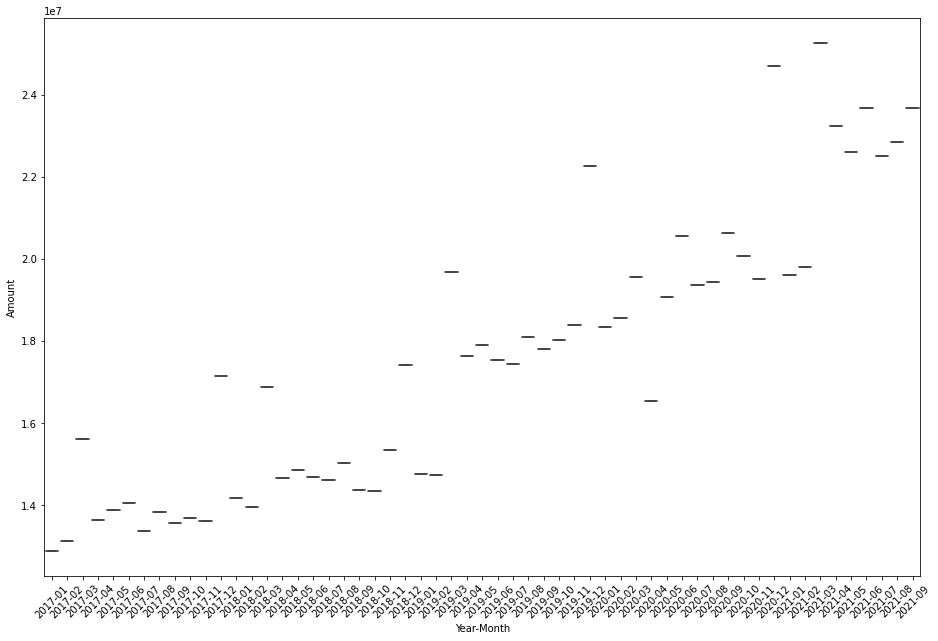

In [ ]:

#creating a box plot using Year-month columns
sns.boxplot(x = 'Year-Month', y='Amount', data = agg_rev_by_month)
from matplotlib import rcParams
import matplotlib.pyplot as plt


# figure size in inches
rcParams['figure.figsize'] = 15.7,10.27
plt.xticks(rotation=45)


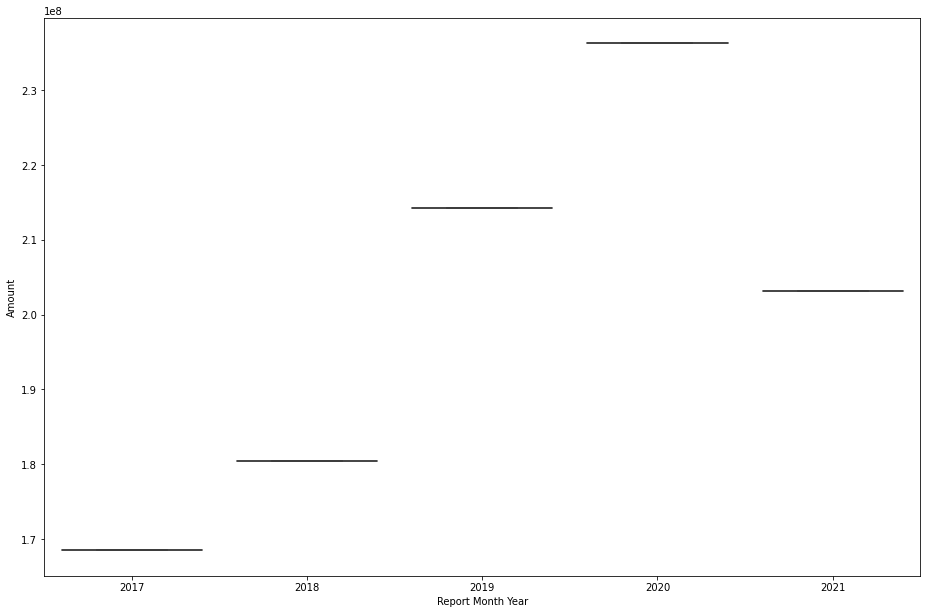

In [ ]:
#creating a box plot using Years
sns.boxplot(x = 'Report Month Year', y='Amount', data = agg_Revenues_Yearly)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,10.27

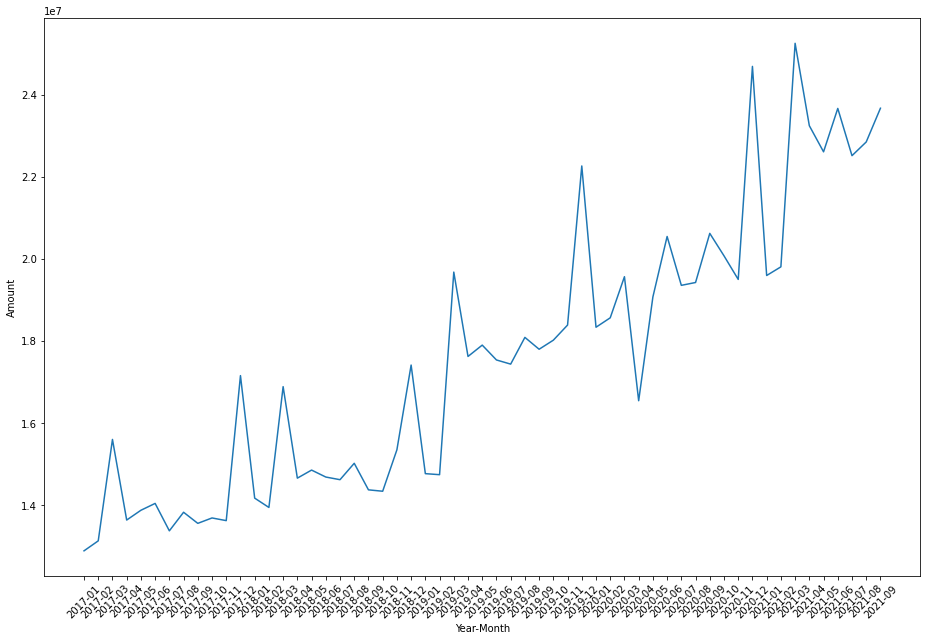

In [ ]:
# plotting with confidence intervals 
sns.lineplot(x="Year-Month", y="Amount", data = agg_rev_by_month)
import matplotlib.pyplot as plt

plt.xticks(rotation=45)

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,10.27

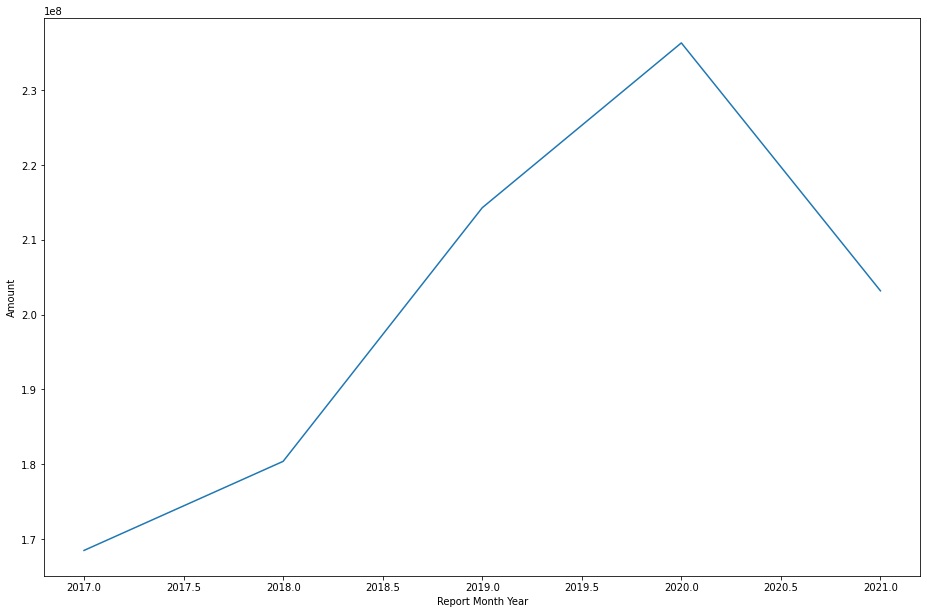

In [ ]:
# plotting with confidence intervals 
sns.lineplot(x="Report Month Year", y="Amount", data = agg_Revenues_Yearly)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,10.27

In [ ]:
filtered_mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01,1
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01,1


In [ ]:
#Grouping by Quarter
agg_Revenues_Quarterly = filtered_mesa_az.groupby('quarter', as_index= False)['Amount'].sum()
agg_Revenues_Quarterly.head(10)

,quarter,Amount
0,1,2.569914e+08
1,2,2.645485e+08
2,3,2.665802e+08
3,4,2.145426e+08


In [ ]:
#plotting the bar graph by year
fig = go.Figure(data=go.Bar(x=agg_Revenues_Quarterly['quarter'].astype(dtype=str), 
                        y= agg_Revenues_Quarterly['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Year in Mesa, AZ',
#                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


Plotting keeping  amount < 0

In [ ]:
mesa_az['Month Number'] = mesa_az['Report Year Month'].astype(str).str[4:]

In [ ]:
mesa_az['Report Month Date']

198     01/01/2017 12:00:00 AM
199     01/01/2017 12:00:00 AM
200     01/01/2017 12:00:00 AM
201     01/01/2017 12:00:00 AM
202     01/01/2017 12:00:00 AM
                 ...          
1162    09/01/2021 12:00:00 AM
1163    09/01/2021 12:00:00 AM
1164    09/01/2021 12:00:00 AM
1165    09/01/2021 12:00:00 AM
1166    09/01/2021 12:00:00 AM
Name: Report Month Date, Length: 969, dtype: object

In [ ]:
mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01
199,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01


In [ ]:
#aggregate the data by [month, year]
agg_rev_by_month_unf_meza = mesa_az.groupby(['Report Month Year', 'Month Number'], as_index= False)['Amount'].sum()
agg_rev_by_month_unf_meza.head(2)


,Report Month Year,Month Number,Amount
0,2017,01,12896571.69
1,2017,02,13139325.41


In [ ]:
agg_rev_by_month_unf_meza['Year-Month'] = agg_rev_by_month_unf_meza['Report Month Year'].astype(str) + '-' + agg_rev_by_month_unf_meza['Month Number'].astype(str)

agg_rev_by_month_unf_meza.head(2)

,Report Month Year,Month Number,Amount,Year-Month
0,2017,01,12896571.69,2017-01
1,2017,02,13139325.41,2017-02


In [ ]:

import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_rev_by_month_unf_meza['Year-Month'].astype(dtype=str), 
                        y=agg_rev_by_month_unf_meza['Amount'],
                        marker_color='indianred', text="Revenue"))
fig.update_layout({"title": '                        Sales Tax Revenue by Month Mesa, AZ(Including Negative Amount Values)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Revenues"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

In [ ]:
#plotting the bar graph
fig = go.Figure(data=go.Bar(x=agg_rev_by_month_unf_meza['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month_unf_meza['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month in Mesa, AZ(Including Negative Values) ',
#                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:
#adding

In [ ]:
#grouping by year
agg_Revenues_Yearly_unf_meza = mesa_az.groupby('Report Month Year', as_index= False)['Amount'].sum()
agg_Revenues_Yearly_unf_meza.head(10)



,Report Month Year,Amount
0,2017,1.684338e+08
1,2018,1.803957e+08
2,2019,2.142172e+08
3,2020,2.363069e+08
4,2021,2.031845e+08


In [ ]:
#plotting the bar graph
fig = go.Figure(data=go.Bar(x=agg_Revenues_Yearly_unf_meza['Report Month Year'].astype(dtype=str), 
                        y= agg_Revenues_Yearly_unf_meza['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Year in Mesa, AZ(Including Negative Values) ',
#                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=agg_Revenues_Yearly_unf_meza['Report Month Year'].astype(dtype=str), 
                        y=agg_Revenues_Yearly_unf_meza['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Sales Tax Revenue by Year, Mesa, AZ(Including Negative Values)',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()


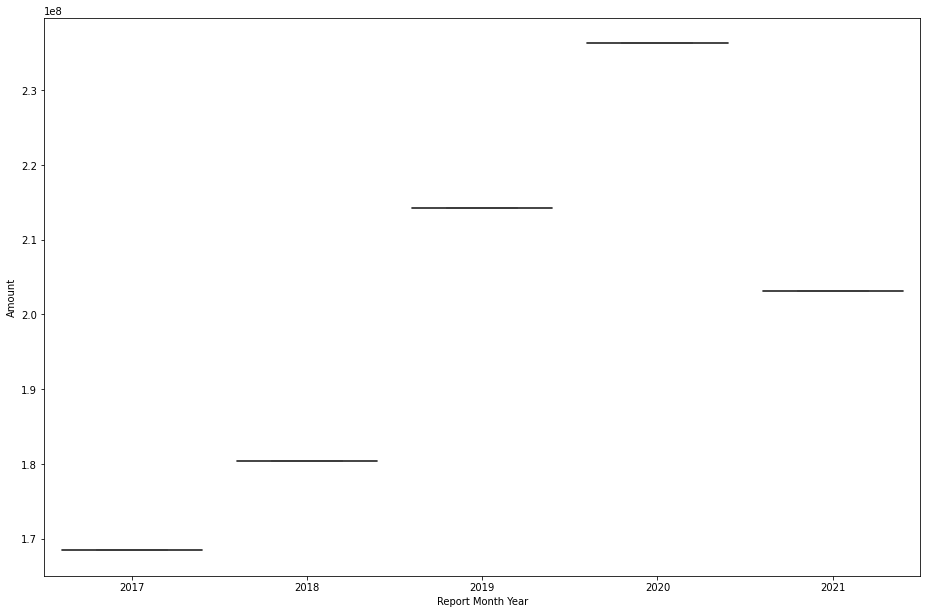

In [ ]:
#creating a box plot using Years
sns.boxplot(x = 'Report Month Year', y='Amount', data = agg_Revenues_Yearly_unf_meza)



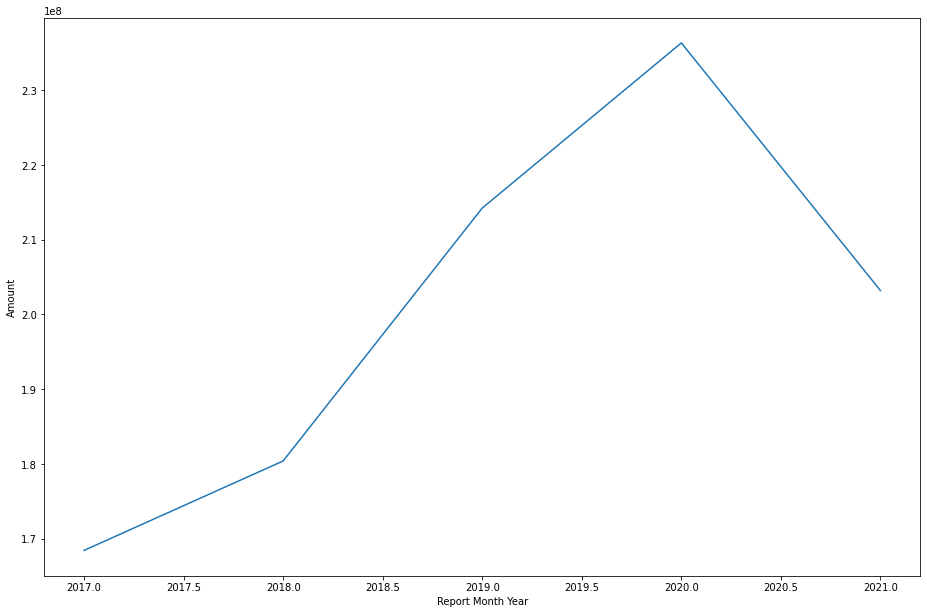

In [ ]:
# plotting with confidence intervals 
sns.lineplot(x="Report Month Year", y="Amount", data = agg_Revenues_Yearly_unf_meza)


In [ ]:
mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number
198,01/01/2017 12:00:00 AM,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01
199,01/01/2017 12:00:00 AM,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01


In [ ]:
mesa_az['Report Month Date'] = pd.to_datetime(mesa_az['Report Month Date'])
mesa_az['quarter'] = mesa_az['Report Month Date'].dt.quarter
mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01,1
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01,1


In [ ]:
mesa_az.sample(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter
1134,2021-08-01,2021,Aug,202108,TPT,004,Utilities,3,Utilities,1987163.27,1738767.85,08,3
372,2017-11-01,2017,Nov,201711,TPT,010,Job Printing,7,Printing and Advertising,25412.55,25412.55,11,4


In [ ]:
#Grouping by Quarter
agg_Revenues_Quarterly = mesa_az.groupby('quarter', as_index = False)['Amount'].sum()
agg_Revenues_Quarterly.head(10)

,quarter,Amount
0,1,2.569830e+08
1,2,2.645485e+08
2,3,2.665167e+08
3,4,2.144899e+08


In [ ]:
#plotting the bar graph
fig = go.Figure(data=go.Bar(x=agg_Revenues_Quarterly['quarter'].astype(dtype=str), 
                        y= agg_Revenues_Quarterly['Amount'],
                        marker_color='indianred', text="Revenue"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Quarter in Mesa, AZ(Including Negative Values) ',
                   "xaxis": {"title":"Quarter"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


In [ ]:
mesa_az.head()

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01,1
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01,1
200,2017-01-01,2017,Jan,201701,TPT,005,Communications,4,Communications,194296.91,194296.91,01,1
201,2017-01-01,2017,Jan,201701,TPT,009,Publication,6,Publishing,14888.66,14888.66,01,1
202,2017-01-01,2017,Jan,201701,TPT,010,Job Printing,7,Printing and Advertising,22495.58,22495.58,01,1


Perform agggregaion by Subcategories

In [ ]:
agg_Revenues_cat_b_class = filtered_mesa_az.groupby('Business Class Description', as_index= False)['Amount'].sum()
agg_Revenues_cat_b_class.head(10)

,Business Class Description,Amount
0,Advertising,795141.73
1,Amusement,6252814.88
2,"Commercial Rental, Leasing And Licensing For Use",52219681.46
3,Communications,9340887.24
4,Construction Contracting - Speculative Builders,14321212.91
5,Contracting - Prime,82361518.70
6,Hotel/Motel (Additional Tax),20416225.47
7,Hotels,13276253.84
8,Job Printing,1178354.55
9,MRRA Amount,1034327.13


In [ ]:
fig = go.Figure(data=go.Bar(x=agg_Revenues_cat_b_class['Business Class Description'].astype(dtype=str), 
                        y= agg_Revenues_cat_b_class['Amount'],
                        marker_color='indianred', text="Sales Tax Revenue"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Category Mesa, AZ(Business Class Description)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()

In [ ]:
agg_Revenues_cat = filtered_mesa_az.groupby('Category Code Description', as_index= False)['Amount'].sum()
agg_Revenues_cat.head(10)

,Category Code Description,Amount
0,Amusements,6.252815e+06
1,Communications,9.340887e+06
2,Contracting,9.668273e+07
3,Miscellaneous,9.684319e+04
4,Printing and Advertising,1.973496e+06
5,Publishing,8.307560e+05
6,Rentals,1.566824e+08
7,Restaurants and Bars,9.088685e+07
8,Retail Sales,5.487203e+08
9,TLT,2.041623e+07


In [ ]:
fig = go.Figure(data=go.Bar(x=agg_Revenues_cat['Category Code Description'].astype(dtype=str), 
                        y= agg_Revenues_cat['Amount'],
                        marker_color='indianred', text="Sales Tax Revenue"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Category MEsa, AZ(Category Code Description)',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()

Plotting plotline Revenue for each category over time 

In [ ]:
filtered_mesa_az.head(2)

,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01,1
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01,1


In [ ]:
filtered_mesa_az['Year-Month'] = filtered_mesa_az['Report Month Year'].astype(str) + '-' + filtered_mesa_az['Month Number'].astype(str)
filtered_mesa_az.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Report Month Date,Report Month Year,Report Month Name,Report Year Month,Tax Type,Business Class,Business Class Description,Category,Category Code Description,Amount,Comparable Amount,Month Number,quarter,Year-Month
198,2017-01-01,2017,Jan,201701,TLT,144,Hotel/Motel (Additional Tax),TLT,TLT,393084.12,393084.12,01,1,2017-01
199,2017-01-01,2017,Jan,201701,TPT,004,Utilities,3,Utilities,905638.76,905638.76,01,1,2017-01


In [ ]:
#groupby (['Year-Month', 'Category'])['Amount'].sum()
total_amount_cat = filtered_mesa_az.groupby(['Category Code Description', 'Year-Month'], as_index = False)['Amount'].sum()
total_amount_cat.head(30)

,Category Code Description,Year-Month,Amount
0,Amusements,2017-01,171945.19
1,Amusements,2017-02,134269.71
2,Amusements,2017-03,174186.83
3,Amusements,2017-04,105274.44
4,Amusements,2017-05,89361.01
5,Amusements,2017-06,104485.27
6,Amusements,2017-07,76803.45
7,Amusements,2017-08,60615.80
8,Amusements,2017-09,64798.34
9,Amusements,2017-10,75191.52


In [ ]:
px.line(total_amount_cat, 
        x="Year-Month", 
        y="Amount", 
        color="Category Code Description", 
        #text="Revenue",
       title="Sales Tax Revenue by Category")

From looking at the different trend lines we can tell that the Retail Sales Trend line varies greatly from the other category trend lines. Whereas the others tend to stay relatvely constant over time(means and sandard deviations do not tend to differ). To make the retail sales Category more forecastable, we need to make this trend line more stationary. This may include transformations(log), lag differences, etc.

**Implementing A Simplet Facebook Prophet model**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import numpy as np
import random
import statsmodels.api as sm
# prophet by Facebook
from fbprophet import Prophet
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
agg_rev_by_month_meza = agg_rev_by_month
agg_rev_by_month_meza

,Report Month Year,Month Number,Amount,Year-Month
0,2017,01,12896571.69,2017-01
1,2017,02,13139325.41,2017-02
2,2017,03,15607368.35,2017-03
3,2017,04,13645545.70,2017-04
4,2017,05,13883814.90,2017-05
5,2017,06,14050340.53,2017-06
6,2017,07,13383170.04,2017-07
7,2017,08,13835228.17,2017-08
8,2017,09,13565174.04,2017-09
9,2017,10,13696543.78,2017-10


In [ ]:
agg_rev_by_month_meza['ds'] = pd.to_datetime(agg_rev_by_month_meza['Year-Month'].astype(str) + '-01')

In [ ]:
agg_rev_by_month_meza.head(3)

,Report Month Year,Month Number,Amount,Year-Month,ds
0,2017,01,12896571.69,2017-01,2017-01-01
1,2017,02,13139325.41,2017-02,2017-02-01
2,2017,03,15607368.35,2017-03,2017-03-01


In [ ]:
agg_rev_by_month_meza = agg_rev_by_month_meza.drop(['Report Month Year', 'Month Number', 'Year-Month'], axis = 1)
agg_rev_by_month_meza

,Amount,ds
0,12896571.69,2017-01-01
1,13139325.41,2017-02-01
2,15607368.35,2017-03-01
3,13645545.70,2017-04-01
4,13883814.90,2017-05-01
5,14050340.53,2017-06-01
6,13383170.04,2017-07-01
7,13835228.17,2017-08-01
8,13565174.04,2017-09-01
9,13696543.78,2017-10-01


In [ ]:
agg_rev_by_month_meza.head(3)

,Amount,ds
0,12896571.69,2017-01-01
1,13139325.41,2017-02-01
2,15607368.35,2017-03-01


In [ ]:
agg_rev_by_month_meza = agg_rev_by_month_meza.rename(columns={'Amount':'y'})
agg_rev_by_month_meza.head(2)

,y,ds
0,12896571.69,2017-01-01
1,13139325.41,2017-02-01


In [ ]:
agg_rev_by_month_meza.tail(2)

,y,ds
55,22845875.08,2021-08-01
56,23666698.18,2021-09-01


Now we have the data in the format required to implement Prophet

In [ ]:
#plotting the bar graph
fig = go.Figure(data=go.Bar(x=agg_rev_by_month_unf_meza['Year-Month'].astype(dtype=str), 
                        y= agg_rev_by_month_unf_meza['Amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Bar Graph of Sales Tax Revenue by Month in Mesa, AZ(Including Negative Values) ',
#                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Sales Tax Revenue"},
                   "showlegend": False})

fig.show()


Lets add a trend line on the bar plot

In [ ]:
agg_rev_by_month_meza.head(2)

,y,ds
0,12896571.69,2017-01-01
1,13139325.41,2017-02-01


In [ ]:
from datetime import date

agg_rev_by_month_meza['date_ordinal'] = pd.to_datetime(agg_rev_by_month_meza['ds']).apply(lambda date: date.toordinal())
agg_rev_by_month_meza.head(3)

,y,ds,date_ordinal
0,12896571.69,2017-01-01,736330
1,13139325.41,2017-02-01,736361
2,15607368.35,2017-03-01,736389


[Text(0, 0, '2016-08-24'),
 Text(0, 0, '2017-03-12'),
 Text(0, 0, '2017-09-28'),
 Text(0, 0, '2018-04-16'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2019-05-21'),
 Text(0, 0, '2019-12-07'),
 Text(0, 0, '2020-06-24'),
 Text(0, 0, '2021-01-10'),
 Text(0, 0, '2021-07-29'),
 Text(0, 0, '2022-02-14')]

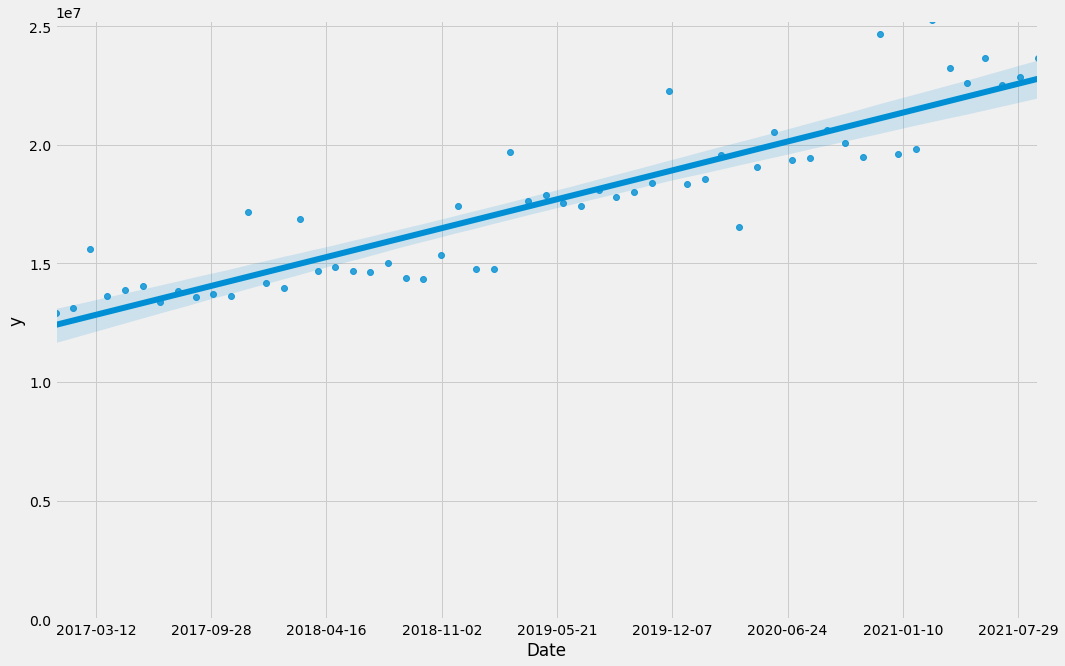

In [ ]:
import seaborn as sns

ax = sns.regplot(
    data=agg_rev_by_month_meza,
    x='date_ordinal',
    y='y',
)
# Tighten up the axes for prettiness
ax.set_xlim(agg_rev_by_month_meza['date_ordinal'].min() - 1, agg_rev_by_month_meza['date_ordinal'].max() + 1)
ax.set_ylim(0, agg_rev_by_month_meza['y'].max() + 1)



#adding readabla labels
ax.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set_xticklabels(new_labels)

As we can see from the graph above, this data exhibits a linear relationship. This knowledge will be useful later when we are performing modeling. 

Splitting the data into train and test 

In [ ]:
agg_rev_by_month_meza = agg_rev_by_month_meza.drop('date_ordinal', axis = 1)

In [ ]:
agg_rev_by_month_meza.tail(50)

In [ ]:
agg_rev_by_month_meza.shape

(57, 2)

In [ ]:
agg_rev_by_month_meza

In [ ]:
end_date = '2021-01-01'
mask1 = (agg_rev_by_month_meza['ds'] <= end_date)
mask2 = (agg_rev_by_month_meza['ds'] > end_date)

In [ ]:
X_tr = agg_rev_by_month_meza.loc[mask1]
X_tst = agg_rev_by_month_meza.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (49, 2)
test shape (8, 2)


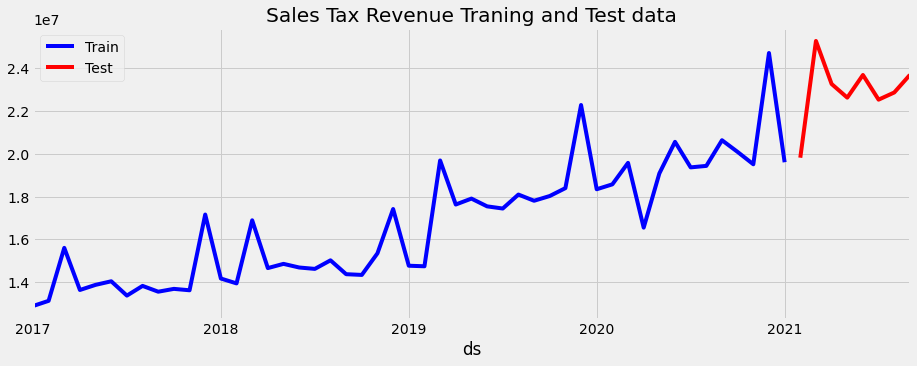

In [ ]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Tax Revenue Traning and Test data')
plt.show()


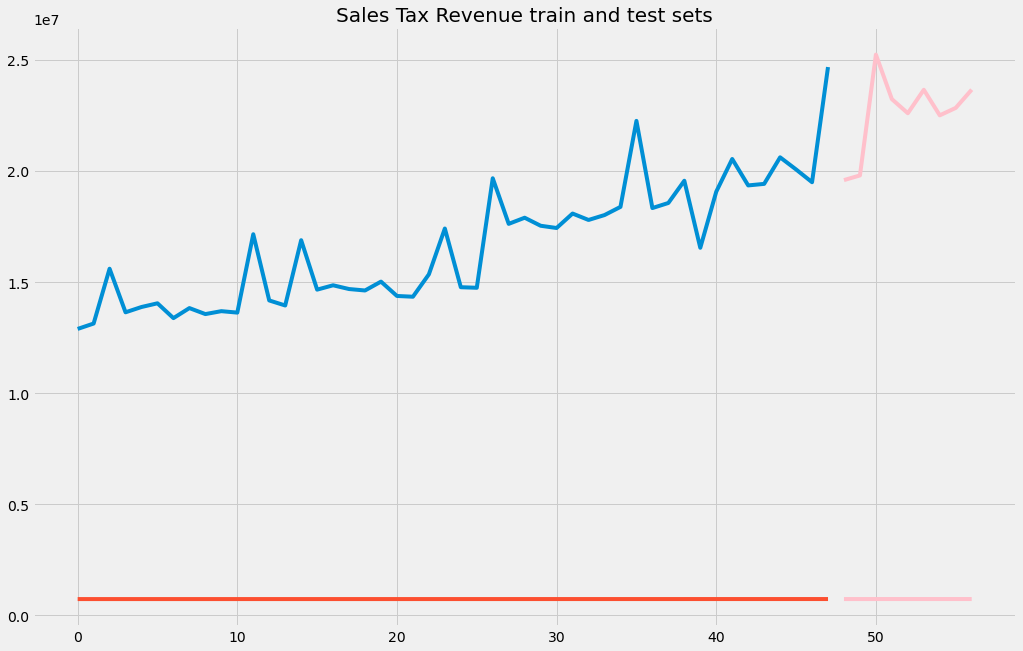

In [ ]:
#using 48 months for training and 9 months for testing 
test_size = 9

df_train = agg_rev_by_month_meza[:-test_size]
df_test = agg_rev_by_month_meza[-test_size:]

plt.title('Sales Tax Revenue train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='pink')
# plt.legend()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
model = Prophet()
model.fit(X_tr)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#we are predicting the next 9 months(as that is our test data)
future = model.make_future_dataframe(periods = 9, freq= 'M')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
51,2021-03-31,2.312118e+07,2.233720e+07,2.387286e+07
52,2021-04-30,2.173732e+07,2.101546e+07,2.246346e+07
53,2021-05-31,2.048957e+07,1.975672e+07,2.123101e+07
54,2021-06-30,2.189301e+07,2.113481e+07,2.262860e+07
55,2021-07-31,2.322278e+07,2.248111e+07,2.396701e+07
56,2021-08-31,2.178678e+07,2.103776e+07,2.251913e+07
57,2021-09-30,2.259361e+07,2.182009e+07,2.329472e+07


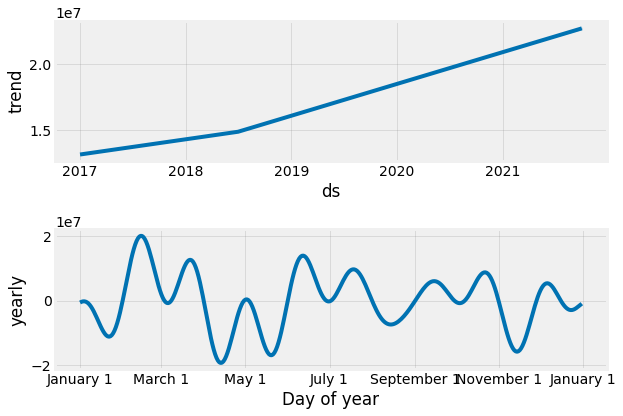

In [ ]:
fig = model.plot_components(forecast)


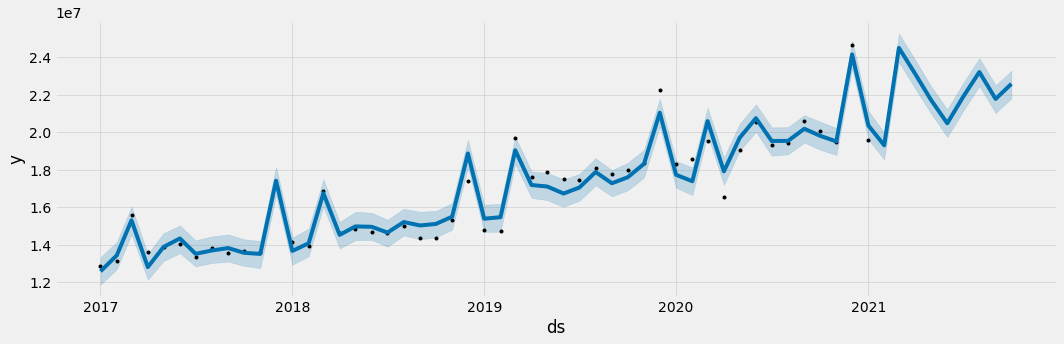

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
plt.show()

Actual vs Prediction Comparison¶


In [ ]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1,2021-03-01,2.329276e+07,2.254571e+07,2.403451e+07
2,2021-04-01,2.090320e+07,2.019125e+07,2.161421e+07
3,2021-05-01,2.207964e+07,2.137570e+07,2.281253e+07
4,2021-06-01,2.263966e+07,2.189381e+07,2.332068e+07
5,2021-07-01,2.192300e+07,2.125089e+07,2.263196e+07
6,2021-08-01,2.220992e+07,2.151198e+07,2.297214e+07
7,2021-09-01,2.244302e+07,2.171660e+07,2.316508e+07


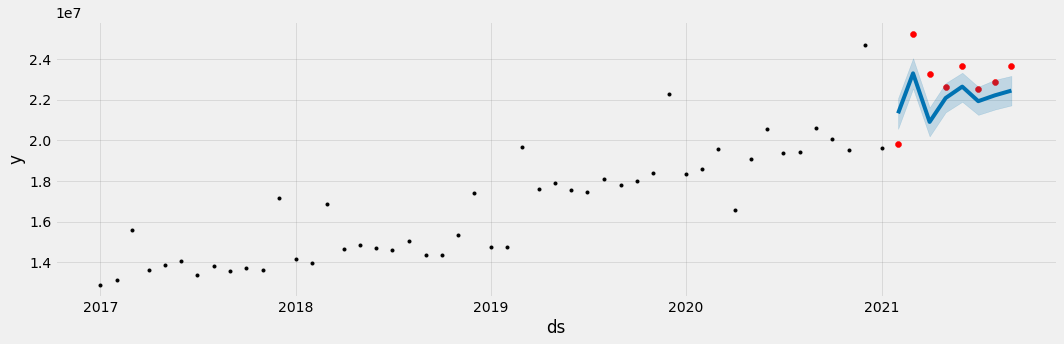

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(X_tst.ds, X_tst['y'], color='r')
fig = model.plot(X_tst_forecast, ax=ax)

Compare the test Sales Tax Revenueand forecasted Sales Tax REvenue¶


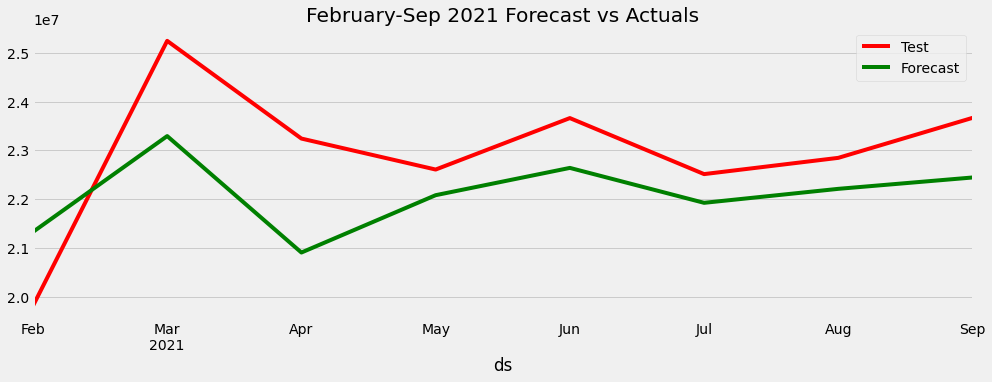

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('February-Sep 2021 Forecast vs Actuals')
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(X_tst['y'], X_tst_forecast['yhat'])
print("MAPE", round(mape,4))

MAPE 5.3359


In [ ]:
X_tst.head(2)

,y,ds
49,19806977.84,2021-02-01
50,25246592.49,2021-03-01


In [ ]:
# # Plot the forecast with the actuals
# f, ax = plt.subplots(1)
# f.set_figheight(5)
# f.set_figwidth(15)
# ax.scatter(X_tst.ds, X_tst['y'], color='r')
# fig = model.plot(X_tst_forecast, ax=ax)
# ax.set_xbound(lower= '2021-02-01', upper = '2021-09-01')
# ax.set_ylim(0, 60000)
# plot = plt.suptitle('First Week of January Forecast vs Actuals')

on an average month, the predictions are off by 5.4 Monetary units (10^e7), or around 2.5%

#Things to implement for EDA, optimization:
https://www.kaggle.com/satishgunjal/tutorial-time-series-analysis-and-forecasting

#### EDA:
 *  Decomposition of Time Series¶
 *   Removing outliers?

Check for Stationarity:

*   Rolling Statistics(mean and standard deviation)
*   Dickey Fullet Test
*   Differencing
*   Transformations( log, square root, cube root, etc.)
*   Compare Predicted values with original values(modeling the transformed and original data)

Checking for Correlaiton:
*   ACF/PACF plots





####Optimizing the model:

*   Perform modeling on categorical level(subcategories of sales tax revenue)
*   Perform statistical transformations on a categorical level




##Links for specific topics:


Overall:

*   https://www.kaggle.com/satishgunjal/tutorial-time-series-analysis-and-forecasting




Stationarity:
*   https://medium.datadriveninvestor.com/sales-forecast-using-prophet-99bf9ad93fbc (ADF)
*   https://towardsdatascience.com/time-series-from-scratch-stationarity-tests-and-automation-14b02fa5ca4d (Stationarity Tests)
*   https://medium.com/genesis-media/time-series-forecasting-number-of-sessions-on-web-site-c36c85ebdbc (Transformations)


Correlations:

*   https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8 (ACF anf PACF plots)
*   List item

Hyperparameter Tuning:

*   https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning/notebook

*   https://medium.com/databulls/
e-commerce-forecasting-fbprophet-optuna-6e9a83d89079
*   https://www.kaggle.com/hasanbasriakcay/e-commerce-forecasting-fbprophet-optuna

*   https://nbviewer.org/github/ryankarlos/prophet/blob/9e6d9548d1caca27af3367819bab10a65da10392/notebooks/diagnostics.ipynb#Hyperparameter-Optimisation%20def%20create_param_combinations(**param_dict):%20param_iter%20=%20itertools.product(*param_dict.values())%20params%20=[]%20for%20param%20in%20param_iter:%20params.append(param)%20params_df%20=%20pd.DataFrame(params,%20columns=list(param_dict.keys()))%20return%20params_df%20def%20single_cv_run(history_df,%20metrics,%20param_dict):%20m%20=%20Prophet(**param_dict)%20m.add_country_holidays(country_name='US')%20m.fit(history_df)%20df_cv%20=%20cross_validation(m,%20initial='400%20days',%20period='90%20days',%20horizon%20=%20'180%20days')%20df_p%20=%20performance_metrics(df_cv).mean().to_frame().T%20df_p['params']%20=%20str(param_dict)%20df_p%20=%20df_p.loc[:,%20metrics]%20return%20df_p%20param_grid%20=%20{%20'changepoint_prior_scale':%20[0.005,%200.05,%200.5,%205],%20'changepoint_range':%20[0.8,%200.9],%20'seasonality_prior_scale':[0.1,%201,%2010.0],%20'holidays_prior_scale':[0.1,%201,%2010.0],%20'seasonality_mode':%20['multiplicative',%20'additive'],%20'growth':%20['linear',%20'logistic'],%20'yearly_seasonality':%20[5,%2010,%2020]%20}%20metrics%20=%20['horizon',%20'rmse',%20'mape',%20'params']%20results%20=%20[]%20params_df%20=%20create_param_combinations(**param_grid)%20for%20param%20in%20params_df.values:%20param_dict%20=%20dict(zip(params_df.keys(),%20param))%20cv_df%20=%20single_cv_run(df,%20%20metrics,%20param_dict)%20results.append(cv_df)%20results_df%20=%20pd.concat(results).reset_index(drop=True)%20best_param%20=%20results_df.loc[results_df['mape']%20==%20min(results_df['mape']),%20['params']]%20print(f'\n%20The%20best%20param%20combination%20is%20{best_param.values[0][0]}')%20results_df

*   https://medium.com/dropout-analytics/cross-validating-prophet-at-scale-72b1a21b6433

*   https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning

Hyperparaameter Tuning With optuna:
https://medium.com/databulls/e-commerce-forecasting-fbprophet-optuna-6e9a83d89079
https://www.kaggle.com/hasanbasriakcay/e-commerce-forecasting-fbprophet-optuna






###Seasonality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
total_amount_cat.head(2)

,Category Code Description,Year-Month,Amount
0,Amusements,2017-01,171945.19
1,Amusements,2017-02,134269.71


In [ ]:
total_amount_cat.columns

Index(['Category Code Description', 'Year-Month', 'Amount'], dtype='object')

In [ ]:
#plotting the total revenue, hue = 'year'
total_amount_cat_temp = total_amount_cat.copy()
total_amount_cat_temp

,Category Code Description,Year-Month,Amount
0,Amusements,2017-01,171945.19
1,Amusements,2017-02,134269.71
2,Amusements,2017-03,174186.83
3,Amusements,2017-04,105274.44
4,Amusements,2017-05,89361.01
...,...,...,...
565,Utilities,2021-05,1195882.73
566,Utilities,2021-06,1774064.47
567,Utilities,2021-07,1855668.51
568,Utilities,2021-08,1987163.27


In [ ]:
total_amount_cat_temp = total_amount_cat_temp.drop('Category Code Description', axis = 1)
total_amount_cat_temp

,Year-Month,Amount
0,2017-01,171945.19
1,2017-02,134269.71
2,2017-03,174186.83
3,2017-04,105274.44
4,2017-05,89361.01
...,...,...
565,2021-05,1195882.73
566,2021-06,1774064.47
567,2021-07,1855668.51
568,2021-08,1987163.27


In [ ]:
total_amount_cat_temp = total_amount_cat_temp.groupby('Year-Month', as_index = False)['Amount'].sum()
total_amount_cat_temp

,Year-Month,Amount
0,2017-01,12896571.69
1,2017-02,13139325.41
2,2017-03,15607368.35
3,2017-04,13645545.70
4,2017-05,13883814.90
5,2017-06,14050340.53
6,2017-07,13383170.04
7,2017-08,13835228.17
8,2017-09,13565174.04
9,2017-10,13696543.78


In [ ]:
total_amount_cat_df = total_amount_cat_temp.copy()
total_amount_cat_df['Year-Month'] = pd.to_datetime(total_amount_cat_df['Year-Month'])
total_amount_cat_df = total_amount_cat_df.set_index(total_amount_cat_df['Year-Month'])
total_amount_cat_df = total_amount_cat_df.drop('Year-Month', axis = 1)
total_amount_cat_df
# total_amount_cat_df.drop('Year-Month', axis = 1)

,Amount
Year-Month,
2017-01-01,12896571.69
2017-02-01,13139325.41
2017-03-01,15607368.35
2017-04-01,13645545.70
2017-05-01,13883814.90
2017-06-01,14050340.53
2017-07-01,13383170.04
2017-08-01,13835228.17
2017-09-01,13565174.04


In [ ]:
total_amount_cat_temp['Year-Month'] = pd.to_datetime(total_amount_cat_temp['Year-Month'])
total_amount_cat_temp = total_amount_cat_temp.set_index(total_amount_cat_temp['Year-Month'])

total_amount_cat_temp = total_amount_cat_temp.drop('Year-Month', axis = 1)
total_amount_cat_temp

,Amount
Year-Month,
2017-01-01,12896571.69
2017-02-01,13139325.41
2017-03-01,15607368.35
2017-04-01,13645545.70
2017-05-01,13883814.90
2017-06-01,14050340.53
2017-07-01,13383170.04
2017-08-01,13835228.17
2017-09-01,13565174.04


In [ ]:
total_amount_cat_temp.dtypes

Amount    float64
dtype: object

In [ ]:
total_amount_cat_temp

,Amount
Year-Month,
2017-01-01,12896571.69
2017-02-01,13139325.41
2017-03-01,15607368.35
2017-04-01,13645545.70
2017-05-01,13883814.90
2017-06-01,14050340.53
2017-07-01,13383170.04
2017-08-01,13835228.17
2017-09-01,13565174.04


Text(0.5, 1.0, 'Trend of the Time Series')

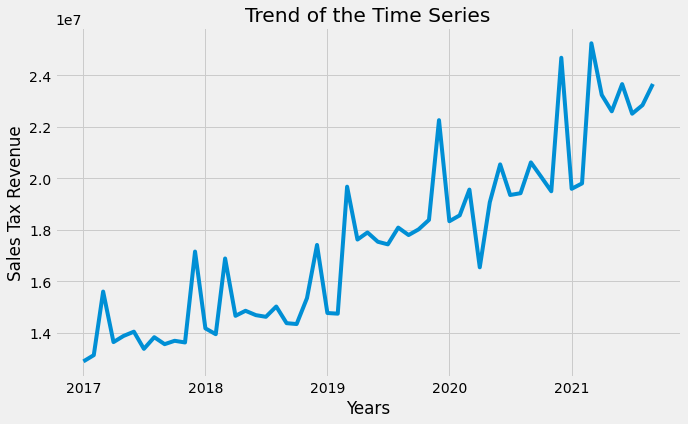

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(total_amount_cat_df)
plt.xlabel('Years')
plt.ylabel('Sales Tax Revenue')
plt.title('Trend of the Time Series')

In [ ]:
total_amount_cat_df.dtypes

Amount    float64
dtype: object

In [ ]:
total_amount_cat_df

,Amount
Year-Month,
2017-01-01,12896571.69
2017-02-01,13139325.41
2017-03-01,15607368.35
2017-04-01,13645545.70
2017-05-01,13883814.90
2017-06-01,14050340.53
2017-07-01,13383170.04
2017-08-01,13835228.17
2017-09-01,13565174.04


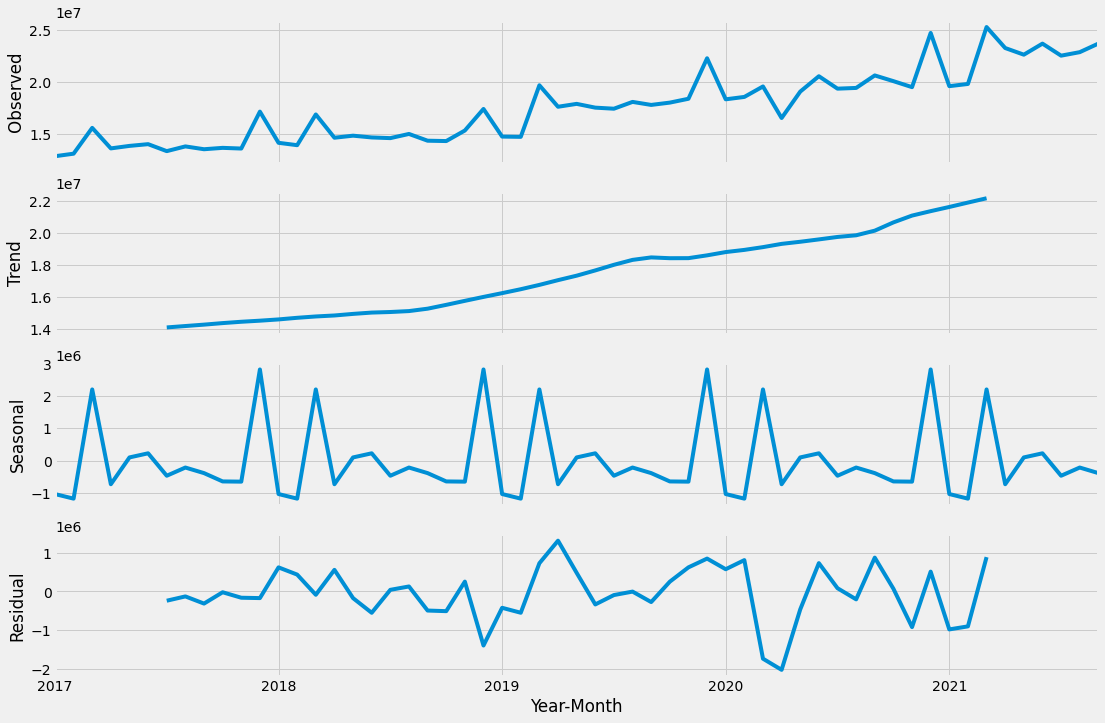

In [ ]:
decomposition = sm.tsa.seasonal_decompose(total_amount_cat_df, model='additive') 
fig = decomposition.plot()

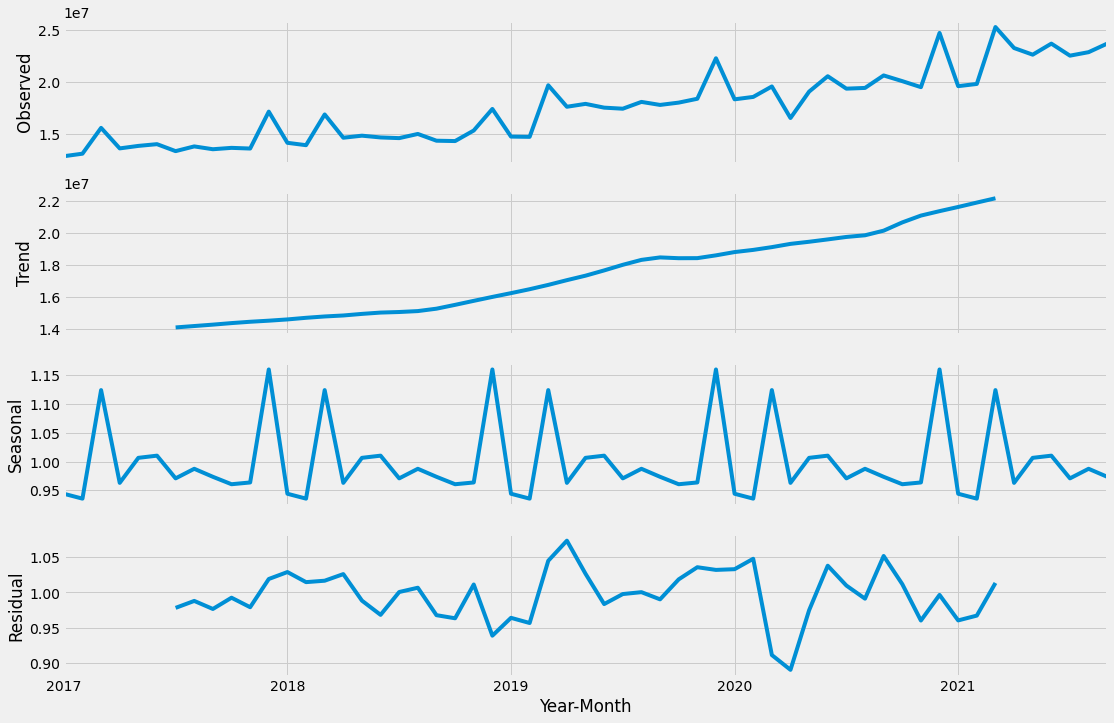

In [ ]:
decomposition = sm.tsa.seasonal_decompose(total_amount_cat_df, model='multiplicative') 
fig = decomposition.plot()

In [ ]:
total_amount_cat_temp

,Amount
Year-Month,
2017-01-01,12896571.69
2017-02-01,13139325.41
2017-03-01,15607368.35
2017-04-01,13645545.70
2017-05-01,13883814.90
2017-06-01,14050340.53
2017-07-01,13383170.04
2017-08-01,13835228.17
2017-09-01,13565174.04


In [ ]:
total_amount_cat_temp.columns

Index(['Amount'], dtype='object')

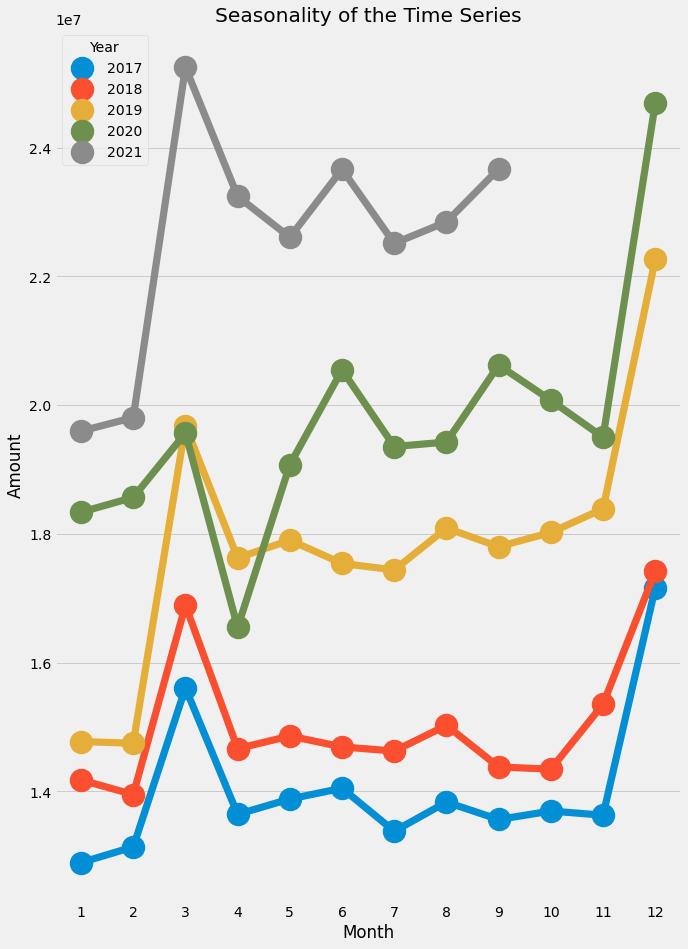

In [ ]:

total_amount_cat_temp['Year'] = pd.DatetimeIndex(total_amount_cat_temp.index).year
total_amount_cat_temp['Month'] = pd.DatetimeIndex(total_amount_cat_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,15))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Amount',hue='Year',data=total_amount_cat_temp)

Every year besides 2019 follows a very similar seasonality pattern.

In [ ]:
total_amount_cat_temp.head(2)

,Amount,Year,Month
Year-Month,,,
2017-01-01,12896571.69,2017,1
2017-02-01,13139325.41,2017,2


##Checking for Stationarity(Look into other methods for stationarity)
https://pub.towardsai.net/statistical-modeling-of-time-series-data-part-3-forecasting-stationary-time-series-using-sarima-f0ff1284bebb

In [ ]:
# Importing the necessary package
from statsmodels.tsa.stattools import adfuller

# ADF test in S&P 500 Returns
adfuller(total_amount_cat_df["Amount"])

(1.0777593579083338,
 0.995022265820076,
 11,
 45,
 {'1%': -3.584828853223594,
  '10%': -2.6023438271604937,
  '5%': -2.9282991495198907},
 1403.7034265421667)

the p-value is extremely high, meaning that the data is not stationary

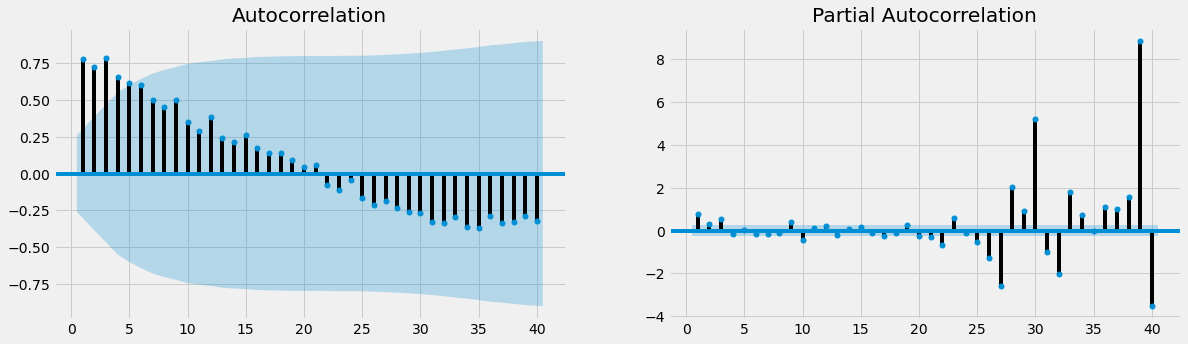

In [ ]:
# Importing Required Package
import statsmodels.graphics.tsaplots as sgt

# Fixing plot size
plt.rcParams["figure.figsize"] = 18, 5

# Defining Subplots
fig, axes = plt.subplots(1, 2)

# Plotting ACF and PACF for S&P 500 Returns
sgt.plot_acf(total_amount_cat_df.Amount, zero = False, lags = 40, ax = axes[0])
sgt.plot_pacf(total_amount_cat_df.Amount, zero = False, lags = 40, ax = axes[1])

# Display the Plot
plt.show()

In [ ]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Sales Tax Revenue')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # # Dickey-Fuller test
    # print('Results of Dickey-Fuller Test')
    # df_test = adfuller(timeseries)
    # df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    # for key, value in df_test[4].items():
    #     df_output['Critical Value (%s)' %key] = value
    # print(df_output)

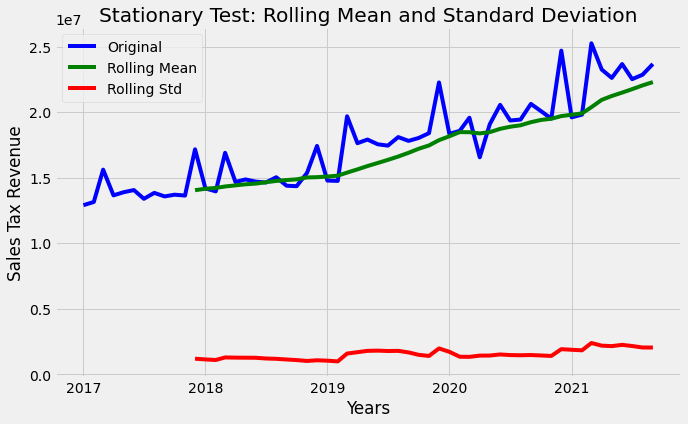

In [ ]:
stationarity_test(total_amount_cat_df)

In [ ]:
total_by_monthly = total_amount_cat_df.copy()
total_by_monthly

,Amount
Year-Month,
2017-01-01,12896571.69
2017-02-01,13139325.41
2017-03-01,15607368.35
2017-04-01,13645545.70
2017-05-01,13883814.90
2017-06-01,14050340.53
2017-07-01,13383170.04
2017-08-01,13835228.17
2017-09-01,13565174.04


Differencing - to convert Non Stationary Data to Stationary Data 

Text(0.5, 1.0, 'Trend of the Time Series(Original trend)')

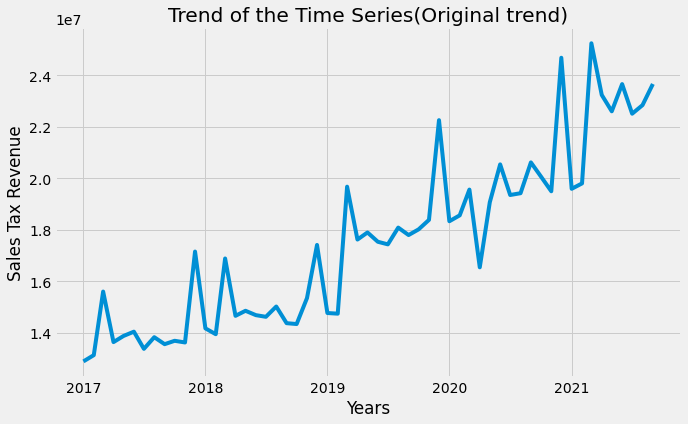

In [ ]:
#Orignial Dataframe
plt.figure(figsize= (10,6))
plt.plot(total_by_monthly)
plt.xlabel('Years')
plt.ylabel('Sales Tax Revenue')
plt.title('Trend of the Time Series(Original trend)')

In [ ]:
total_by_monthly.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
      

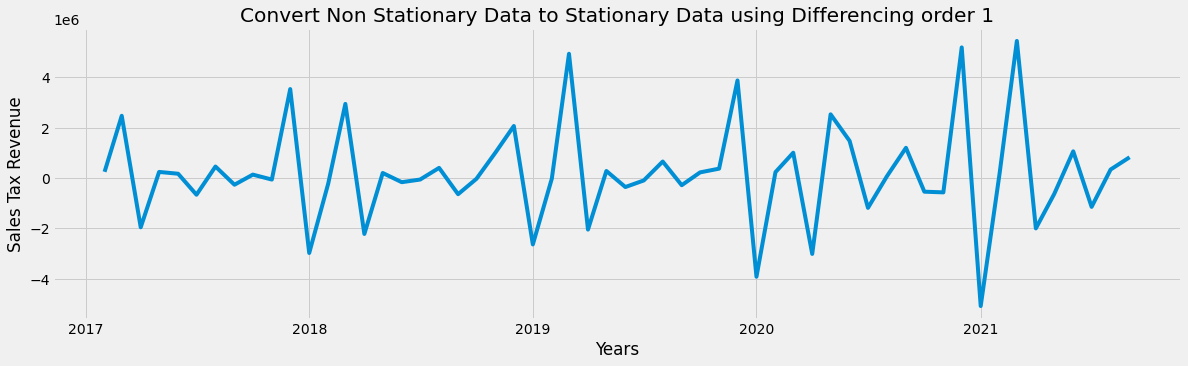

In [ ]:
# First order differencing
df_diff_1 = total_by_monthly.diff(periods = 1) 
plt.xlabel('Years')
plt.ylabel('Sales Tax Revenue')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing order 1')
plt.plot(df_diff_1)

It did a good job of removing the trend 

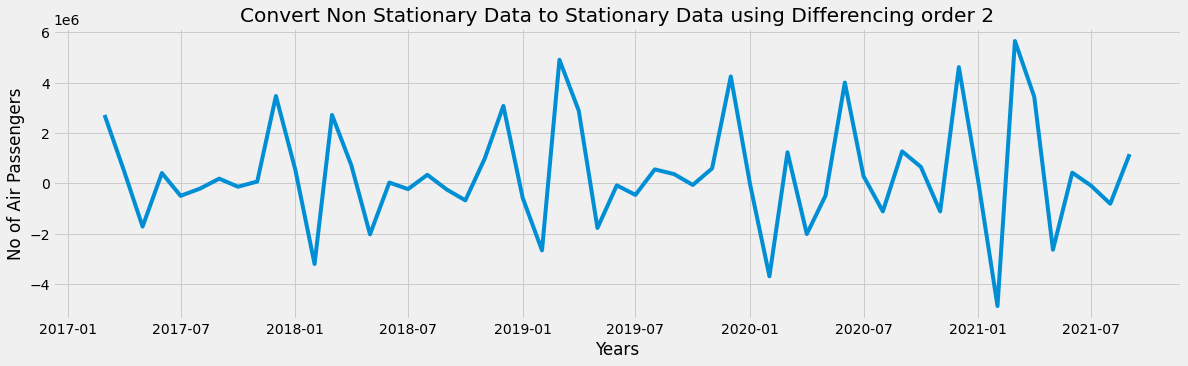

In [ ]:
# Second order differencing
df_diff_2 = total_by_monthly.diff(periods = 2) 
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing order 2')
plt.plot(df_diff_2)

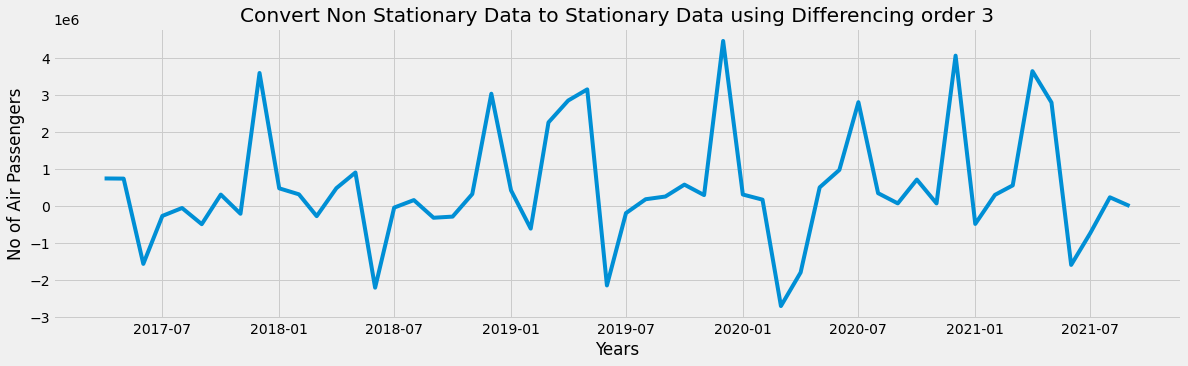

In [ ]:
# Second order differencing
df_diff_3 = total_by_monthly.diff(periods = 3) 
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing order 3')
plt.plot(df_diff_3)

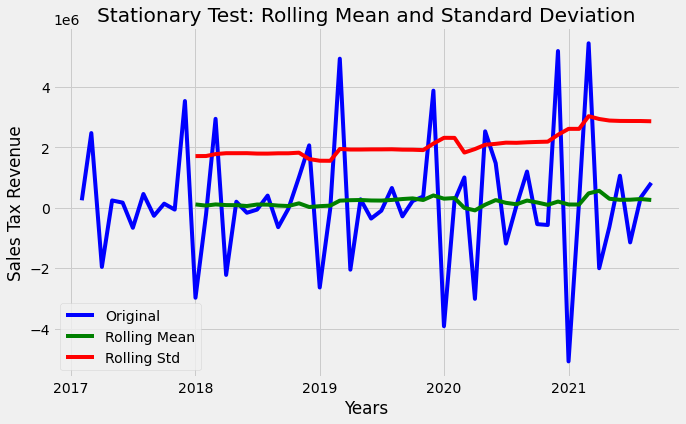

In [ ]:
df_diff_1.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff_1)


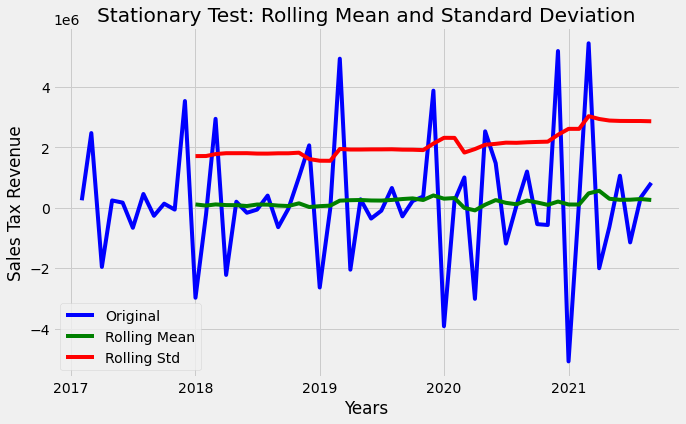

In [ ]:
df_diff_2.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff_1)

####Transformation

Since variance is proportional to the levels, we are going to use the log transformation.



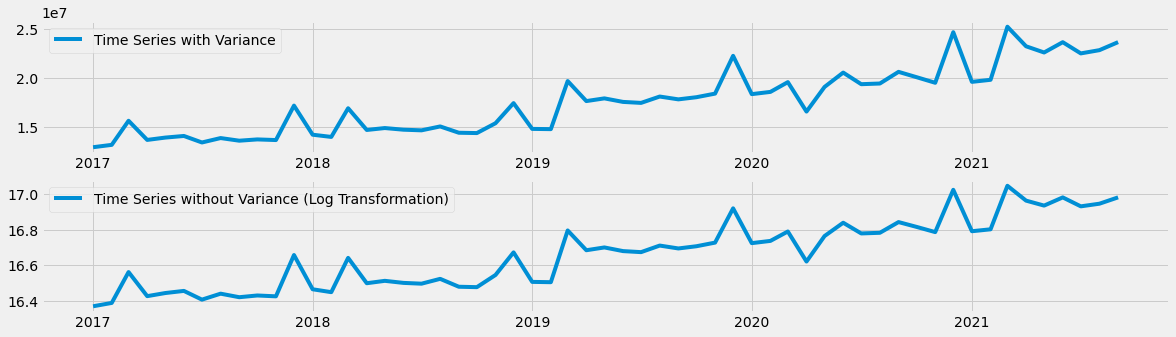

In [ ]:
df_log = np.log(total_by_monthly)

plt.subplot(211)
plt.plot(total_by_monthly, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()


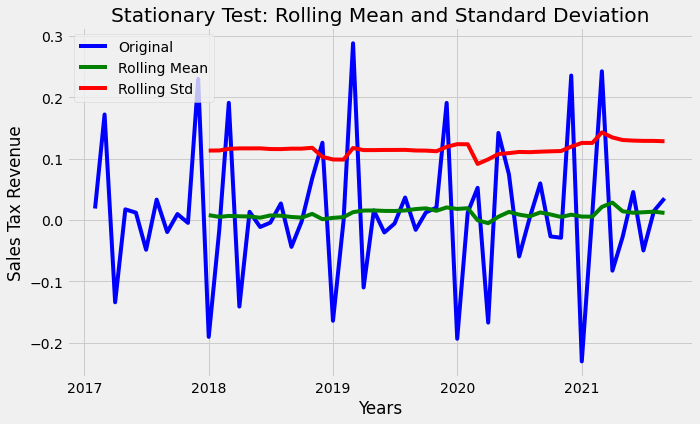

In [ ]:
#Let cross-check the differencing method scores with this log transformed data again.

df_log_diff_1 = df_log.diff(periods = 1) # First order differencing

df_log_diff_1.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff_1)

In [ ]:
total_by_monthly.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
      

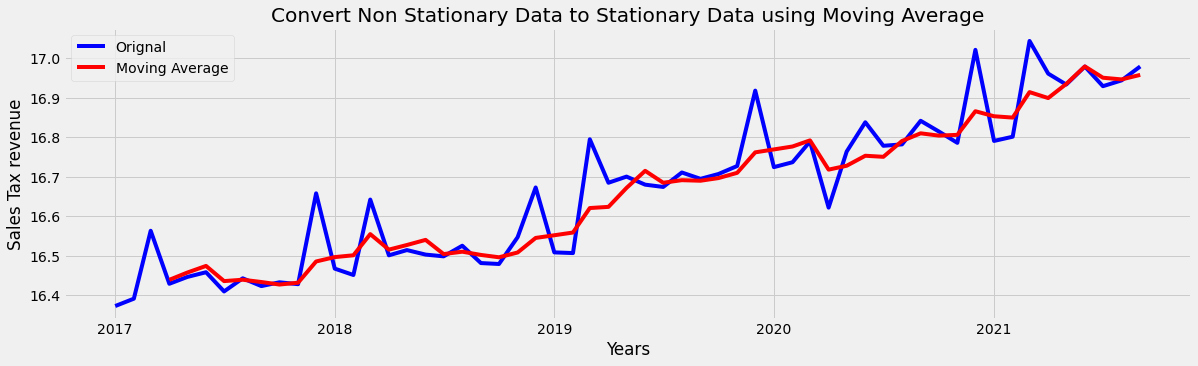

In [ ]:
#we have 4 and a half years of data, so we will use windows of every 4 months
df_log_moving_avg = df_log.rolling(window = 4).mean()
plt.xlabel('Years')
plt.ylabel('Sales Tax revenue')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

The moving average graph is a lot more smooth without any variance. 

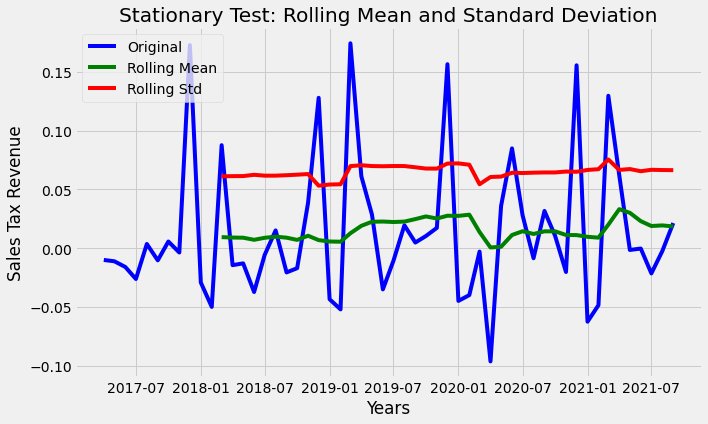

In [ ]:
#LEts try log tranformed data and mean average data
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

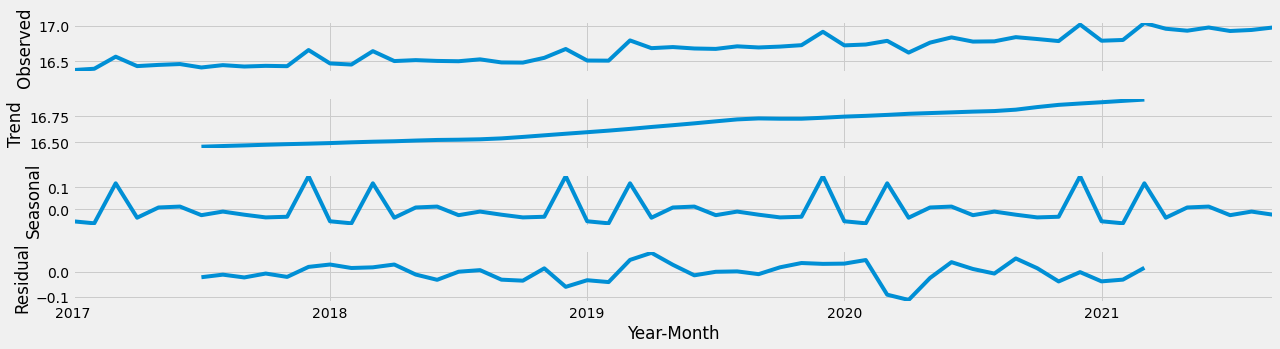

In [ ]:
#decomposition of time series
decomposition = sm.tsa.seasonal_decompose(df_log)
fig = decomposition.plot()

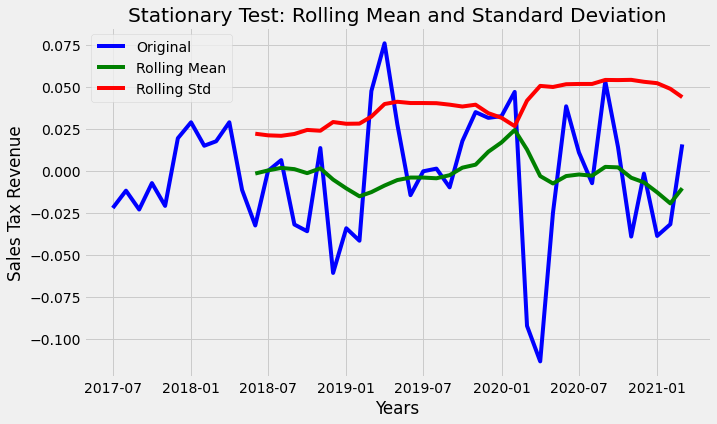

In [ ]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

In [ ]:
total_by_monthly
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [ ]:
# #applying the box cox transformation
# def inverse_boxcox(y, lambda_):
#     return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [ ]:
# total_by_monthly_box = total_by_monthly.copy()
# total_by_monthly_box['Amount'], lambda_prophet = stats.boxcox(total_by_monthly_box['Amount'])
# total_by_monthly_box.reset_index(inplace=True)
# total_by_monthly_box.plot()

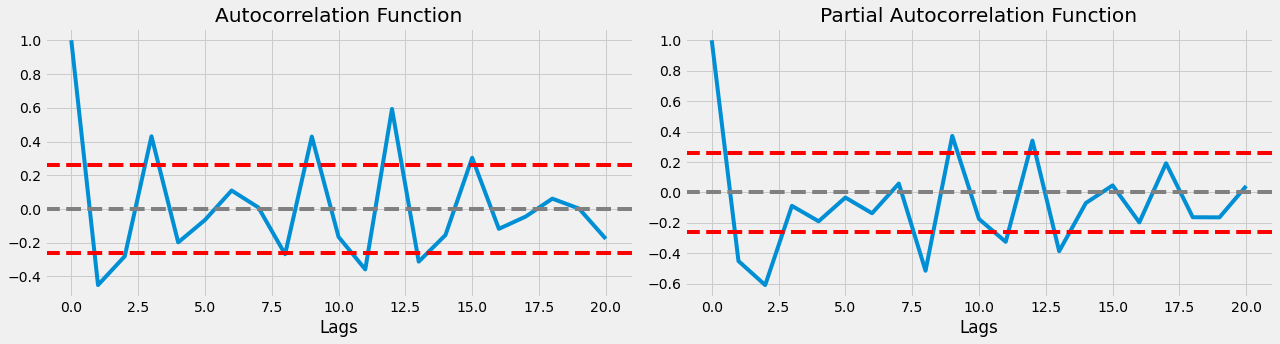

In [ ]:
lag_acf = acf(df_log_diff_1, nlags=20)
lag_pacf = pacf(df_log_diff_1, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_1)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_1)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')

# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_1)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_1)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

###Modeling on a categorical level(Optimizing the model)

In [ ]:
px.line(total_amount_cat, 
        x="Year-Month", 
        y="Amount", 
        color="Category Code Description", 
        #text="Revenue",
       title="Sales Tax Revenue by Category")

In [ ]:
total_amount_cat

,Segment2,Year-Month,Actual
0,AGENCY,2018-01,1.217335e+08
1,AGENCY,2018-02,1.586326e+07
2,AGENCY,2018-03,1.632536e+07
3,AGENCY,2018-04,1.657495e+07
4,AGENCY,2018-05,1.652525e+07
...,...,...,...
535,PUBLIC WORKS,2022-08,3.533018e+05
536,PUBLIC WORKS,2022-09,7.775656e+05
537,PUBLIC WORKS,2022-10,4.429789e+05
538,PUBLIC WORKS,2022-11,4.091778e+05


Seasonality: we consistently see a decrease in seasonlaity in January across all the trend lines and an increase in seasonality in December acriss all the trend lines. 

Based off the trend lines we can see that the categories that may not look stationary are Retail Sales as well as maybe 

In [ ]:
total_amount_cat['Category Code Description'].unique()

array(['Amusements', 'Communications', 'Contracting', 'Miscellaneous',
       'Printing and Advertising', 'Publishing', 'Rentals',
       'Restaurants and Bars', 'Retail Sales', 'TLT', 'Utilities'],
      dtype=object)

In [ ]:
#split the graphs by 

total_amount_cat_amusement = total_amount_cat[total_amount_cat['Category Code Description'] == 'Amusements']
total_amount_cat_comm = total_amount_cat[total_amount_cat['Category Code Description'] == 'Communications']
total_amount_cat_cont = total_amount_cat[total_amount_cat['Category Code Description'] == 'Contracting']

total_amount_cat_misc = total_amount_cat[total_amount_cat['Category Code Description'] == 'Miscellaneous']
total_amount_cat_PandA = total_amount_cat[total_amount_cat['Category Code Description'] == 'Printing and Advertising']

total_amount_cat_publ = total_amount_cat[total_amount_cat['Category Code Description'] == 'Publishing']
total_amount_cat_rent = total_amount_cat[total_amount_cat['Category Code Description'] == 'Rentals']
total_amount_cat_rest_n_bars = total_amount_cat[total_amount_cat['Category Code Description'] == 'Restaurants and Bars']
total_amount_cat_retails = total_amount_cat[total_amount_cat['Category Code Description'] == 'Retail Sales']
total_amount_cat_tlt = total_amount_cat[total_amount_cat['Category Code Description'] == 'TLT']
total_amount_cat_util = total_amount_cat[total_amount_cat['Category Code Description'] == 'Utilities']


In [ ]:
total_amount_cat_amusement

,Category Code Description,Year-Month,Amount
0,Amusements,2017-01,171945.19
1,Amusements,2017-02,134269.71
2,Amusements,2017-03,174186.83
3,Amusements,2017-04,105274.44
4,Amusements,2017-05,89361.01
5,Amusements,2017-06,104485.27
6,Amusements,2017-07,76803.45
7,Amusements,2017-08,60615.80
8,Amusements,2017-09,64798.34
9,Amusements,2017-10,75191.52


In [ ]:
total_amount_cat_amusement = total_amount_cat_amusement.drop('Category Code Description', axis = 1)
total_amount_cat_comm = total_amount_cat_comm.drop('Category Code Description', axis = 1)
total_amount_cat_cont = total_amount_cat_cont.drop('Category Code Description', axis = 1)
total_amount_cat_misc = total_amount_cat_misc.drop('Category Code Description', axis = 1)
total_amount_cat_PandA = total_amount_cat_PandA.drop('Category Code Description', axis = 1)
total_amount_cat_publ = total_amount_cat_publ.drop('Category Code Description', axis = 1)
total_amount_cat_rent = total_amount_cat_rent.drop('Category Code Description', axis = 1)
total_amount_cat_rest_n_bars = total_amount_cat_rest_n_bars.drop('Category Code Description', axis = 1)
total_amount_cat_retails = total_amount_cat_retails.drop('Category Code Description', axis = 1)
total_amount_cat_tlt = total_amount_cat_tlt.drop('Category Code Description', axis = 1)
total_amount_cat_util = total_amount_cat_util.drop('Category Code Description', axis = 1)


###AutoCorrelation and Correlaiton

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

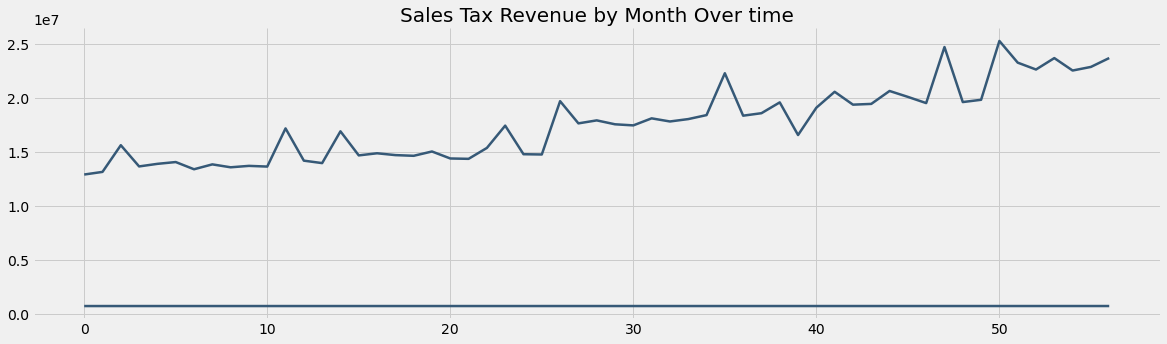

In [ ]:
plt.title('Sales Tax Revenue by Month Over time', size=20)
plt.plot(agg_rev_by_month_meza)

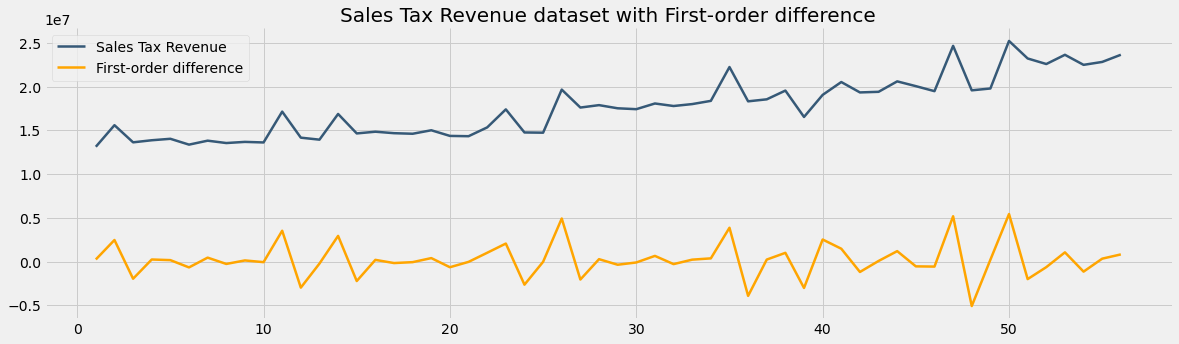

In [ ]:
# First-order difference
agg_rev_by_month_meza['Revenue_Diff'] = agg_rev_by_month_meza['y'].diff(periods=1)
agg_rev_by_month_meza = agg_rev_by_month_meza.dropna()

# Plot
plt.title('Sales Tax Revenue dataset with First-order difference', size=20)
plt.plot(agg_rev_by_month_meza['y'], label='Sales Tax Revenue')
plt.plot(agg_rev_by_month_meza['Revenue_Diff'], label='First-order difference', color='orange')
plt.legend();

In [ ]:
# Calculate autocorrelation
acf_values = acf(agg_rev_by_month_meza['Revenue_Diff'])
np.round(acf_values, 2)

array([ 1.  , -0.45, -0.29,  0.47, -0.22, -0.09,  0.17, -0.01, -0.28,
        0.42, -0.13, -0.36,  0.56, -0.28, -0.17,  0.31, -0.1 , -0.06,
        0.07, -0.  , -0.17,  0.3 , -0.17, -0.22,  0.45, -0.21, -0.09,
        0.16, -0.09, -0.04,  0.08, -0.  , -0.14,  0.23, -0.11, -0.14,
        0.27, -0.16, -0.08,  0.15, -0.04])

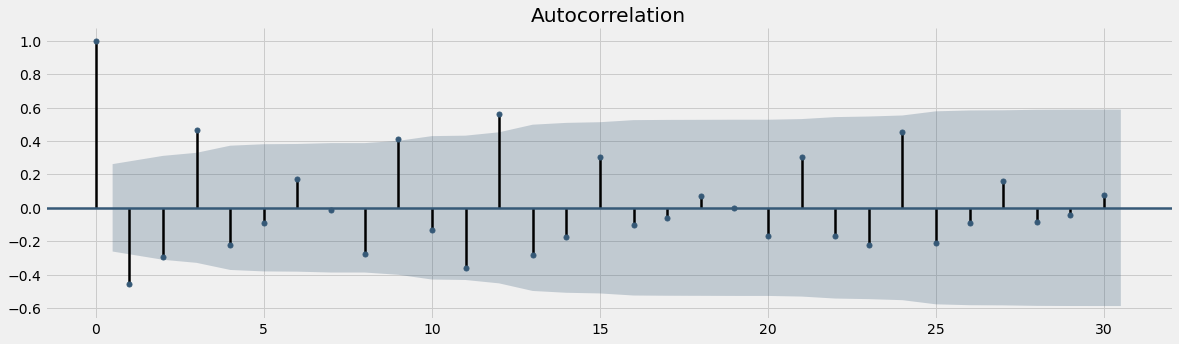

In [ ]:
# Plot autocorrelation
plot_acf(agg_rev_by_month_meza['Revenue_Diff'], lags=30);

In [ ]:
# Calculate partial autocorrelation
pacf_values = pacf(agg_rev_by_month_meza['Revenue_Diff'])

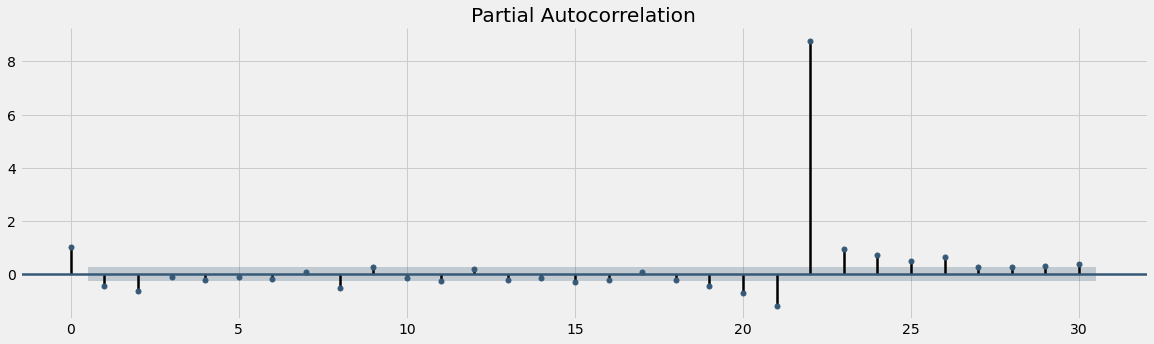

In [ ]:
# Plot partial autocorrelation
plot_pacf(agg_rev_by_month_meza['Revenue_Diff'], lags=30);

In a nutshell:
If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

Looking into Stationarity:
Needs to satisfy these requirements:

*   Constant mean — average value doesn’t change over time.
*   Constant variance — variance doesn’t change over time.
*   Constant covariance — covariance between periods of identical length doesn’t change over time.





Stationary is good for two reasons:
Stationary processes are easier to analyze.
Most forecasting algorithms assume a series is stationary.




In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5



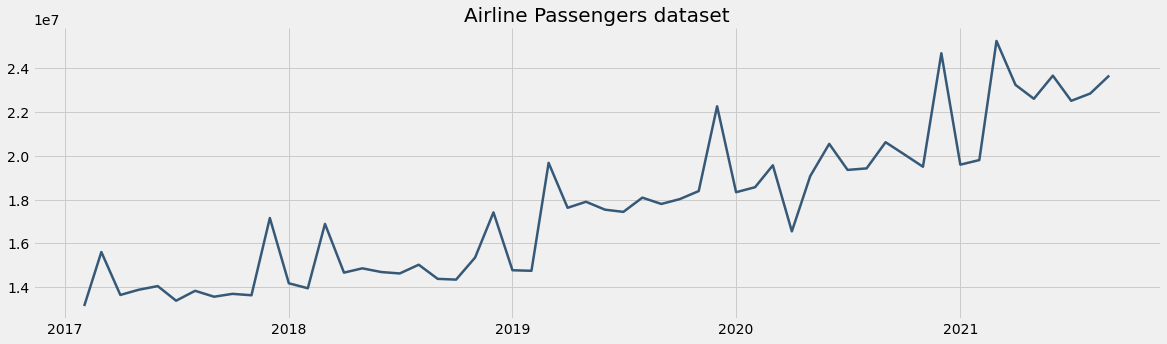

In [ ]:
plt.title('Sales Tax Revenue', size=20)
plt.plot(agg_rev_by_month_meza['ds'], agg_rev_by_month_meza['y'])

In [ ]:
# ADF stationarity test
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
adfuller(agg_rev_by_month_meza['y'])

(0.9644915361825955,
 0.9938767987418325,
 11,
 44,
 {'1%': -3.5885733964124715,
  '10%': -2.6031845661157025,
  '5%': -2.929885661157025},
 1373.6864628630356)

In [ ]:
agg_rev_by_month_meza.columns

Index(['y', 'ds', 'Revenue_Diff'], dtype='object')

In [ ]:
# First and second order difference
agg_rev_by_month_meza['Revenue_Diff1'] = agg_rev_by_month_meza['y'].diff()
agg_rev_by_month_meza['Revenue_Diff2'] = agg_rev_by_month_meza['y'].diff(2)

# Don't forget to drop missing values
agg_rev_by_month_meza = agg_rev_by_month_meza.dropna()

# Plot
plt.title('Sales Tax Revenue dataset with First and Second order difference', size=20)
plt.plot(agg_rev_by_month_meza['y'], label='Sales Tax REvenue')
plt.plot(agg_rev_by_month_meza['Revenue_Diff1'], label='First-order difference', color='orange')
plt.plot(agg_rev_by_month_meza['Revenue_Diff2'], label='Second-order difference', color='green')
plt.legend();



# Perform ADF test
adf_diff_1 = adfuller(agg_rev_by_month_meza['Passengers_Diff1'])
adf_diff_2 = adfuller(agg_rev_by_month_meza['Passengers_Diff2'])

# Extract P-values
p_1 = adf_diff_1[1]
p_2 = adf_diff_2[1]

# Print 
print(f'P-value for 1st order difference: {np.round(p_1, 5)}')
print(f'P-value for 2nd order difference: {np.round(p_2, 5)}')

# Misc.


> Since epsilon noise portion in the formula assume i.i.d. normal distribution, the residual is not assumed to have autocorrelation, unlike ARIMA model. Actually, when we plot the ACF and PACF after the fit of Peyton Manning data, we will see clear AR(1) tendency — exponentially decaying ACF, high PACF at t=1 and close to zero PACF at t≥2.





In [ ]:
# # After getting forecast dataframe using user-defined seasonality "on-season"/"off-season" above...

# from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# df['ds'] = pd.to_datetime(df['ds'],format='%Y-%m-%d')
# df_res = df.merge(forecast,how="inner",on="ds")
# df_res['residual'] = df_res['y'] - df_res['yhat']
# plot_acf(df_res['residual'])
# plot_pacf(df_res['residual'])
# plt.show()

##Final Model

In [ ]:

# # Setup and train model with holidays
# final_model = Prophet( #holidays=holiday,
#                       changepoint_prior_scale= 0.5,
#                       holidays_prior_scale = 0.1,
#                       n_changepoints = 200,
#                       seasonality_mode = 'multiplicative',
#                       weekly_seasonality=True,
#                       daily_seasonality = True,
#                       yearly_seasonality = True,
#                       interval_width=0.95)
# final_model.add_country_holidays(country_name='US')
# final_model.fit(X_tr)


# future = final_model.make_future_dataframe(periods=122, freq='M')
# forecast = final_model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
# Plot the components of the model
# fig = final_model.plot_components(forecast)

# # Plot the forecast
# f, ax = plt.subplots(1)
# f.set_figheight(5)
# f.set_figwidth(15)
# fig = final_model.plot(forecast,ax=ax)
# plt.show()


# X_tst_final= final_model.predict(X_tst)
# X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
# f, ax = plt.subplots(figsize=(14,5))
# f.set_figheight(5)
# f.set_figwidth(15)
# X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
# X_tst_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
# plt.title('Jan & Feb 2020 Forecast vs Actuals')
# plt.show()
# MAPE = mean_absolute_percentage_error(X_tst['y'],abs(X_tst_final['yhat']))
# print('MAPE', MAPE)

##Future Implementations/Other modeling technqiues

NueralProphet:
https://towardsdatascience.com/how-to-use-facebooks-neuralprophet-and-why-it-s-so-powerful-136652d2da8b
https://blog.ml6.eu/is-neuralprophet-better-than-prophet-for-sales-forecasting-de45527163dc

To-do:


*   Making sure of stationarity (https://medium.datadriveninvestor.com/sales-forecast-using-prophet-99bf9ad93fbc)
*   Removing any outliers in our model


*   Adding any additional regressors
*   Stationarize the variables (by differencing, logging, deflating, or whatever) before fitting a regression model
https://towardsdatascience.com/time-series-from-scratch-stationarity-tests-and-automation-14b02fa5ca4d

https://medium.com/genesis-media/time-series-forecasting-number-of-sessions-on-web-site-c36c85ebdbc

*   Moving Averages
*   ACF and PACF plots (https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8)
https://mxplus3.medium.com/interpreting-autocorrelation-partial-autocorrelation-plots-for-time-series-analysis-23f87b102c64
https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f



*   Simple Exponential smoothing (https://towardsdatascience.com/time-series-from-scratch-exponential-smoothing-theory-and-implementation-6683eb271bad)
*   List item

https://people.duke.edu/~rnau/411arim2.htm
https://people.duke.edu/~rnau/timereg.html
https://towardsdatascience.com/multi-step-time-series-forecasting-with-arima-lightgbm-and-prophet-cc9e3f95dfb0

https://medium.com/analytics-vidhya/time-series-analysis-using-prophet-in-python-part-1-math-explained-5936509c175c
https://medium.com/swlh/facebook-prophet-426421f7e331

https://towardsdatascience.com/time-series-forecasting-968192b3781a
https://towardsdatascience.com/mastering-time-series-analysis-in-python-8219047a0351
https://github.com/mscharth/forecasting

https://towardsdatascience.com/time-series-forecasting-968192b3781a

General:
https://ravindraelicherla.medium.com/retail-sales-forecast-using-facebooks-prophet-a47f8597ccd0

https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning

Stationary:
https://medium.datadriveninvestor.com/sales-forecast-using-prophet-99bf9ad93fbc





